In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [131]:
df=pd.read_csv('Customer_Data.csv')

In [132]:
df.head()

id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5

In [133]:
df.shape

(100000, 12)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [135]:
df.isnull().values.any()

False

In [136]:
df.apply(pd.isnull).sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [137]:
df.drop(columns=['id'],axis=1,inplace=True)

In [138]:
df.sample(5)

age  gender  income education region loyalty_status purchase_frequency  \
44009   33    Male   27646  Bachelor   East           Gold         occasional   
32552   31    Male   35387  Bachelor   West         Silver               rare   
50950   25  Female   10141   College  South        Regular         occasional   
46799   34  Female   10002   College   West        Regular               rare   
65130   34    Male   40545   College  North           Gold               rare   

       purchase_amount product_category  promotion_usage  satisfaction_score  
44009             8580      Electronics                0                   4  
32552            12774             Food                1                   4  
50950             3171      Electronics                0                   5  
46799             3610      Electronics                0                   6  
65130            12905             Food                0                   5

In [139]:
df.columns

Index(['age', 'gender', 'income', 'education', 'region', 'loyalty_status',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [140]:
df.describe()

age         income  purchase_amount  promotion_usage  \
count  100000.000000  100000.000000    100000.000000    100000.000000   
mean       30.003260   27516.269880      9634.790840         0.300800   
std         4.480535   12996.782587      4799.339449         0.458608   
min        12.000000    5000.000000      1118.000000         0.000000   
25%        27.000000   16271.750000      5583.000000         0.000000   
50%        30.000000   27584.500000      9452.000000         0.000000   
75%        33.000000   38747.250000     13350.000000         1.000000   
max        49.000000   50000.000000     26204.000000         1.000000   

       satisfaction_score  
count       100000.000000  
mean             5.009650  
std              1.038714  
min              0.000000  
25%              4.000000  
50%              5.000000  
75%              6.000000  
max             10.000000

In [141]:
df.groupby('gender').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage  \
gender                                                              
Female  29.985082  27507.945441      9634.404601         0.300795   
Male    30.021492  27524.618996      9635.178224         0.300805   

        satisfaction_score  
gender                      
Female            5.010544  
Male              5.008753

In [142]:
df.groupby('education').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage  \
education                                                               
Bachelor    29.992800  27555.371644      9656.727666         0.298326   
College     30.031750  27544.391333      9647.306315         0.301751   
HighSchool  29.976437  27423.473616      9586.708502         0.302331   
Masters     29.974531  27470.785452      9614.402710         0.301447   

            satisfaction_score  
education                       
Bachelor              5.009809  
College               5.015072  
HighSchool            5.008537  
Masters               4.989405

In [143]:
df.groupby('region').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage  \
region                                                              
East    30.037175  27467.802853      9615.410820         0.298697   
North   30.044081  27670.206848      9673.361834         0.300482   
South   29.976287  27591.942460      9648.787077         0.305535   
West    29.960114  27411.793686      9619.211458         0.299950   

        satisfaction_score  
region                      
East              5.005087  
North             5.013656  
South             5.012355  
West              5.009754

In [144]:
df.groupby('loyalty_status').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage  \
loyalty_status                                                              
Gold            30.052738  27434.735401      9621.487573         0.297737   
Regular         29.981376  27541.343011      9639.976537         0.301024   
Silver          30.030837  27492.881157      9628.777566         0.301362   

                satisfaction_score  
loyalty_status                      
Gold                      5.013033  
Regular                   5.008198  
Silver                    5.011447

In [145]:
df.groupby('purchase_frequency').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage  \
purchase_frequency                                                              
frequent            30.061806  27474.640259      9616.911371         0.299876   
occasional          29.968648  27575.023723      9661.649870         0.300743   
rare                30.000420  27497.889462      9625.925788         0.301206   

                    satisfaction_score  
purchase_frequency                      
frequent                      5.012441  
occasional                    4.998561  
rare                          5.015154

In [146]:
df.groupby('product_category').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage  \
product_category                                                              
Beauty            30.047071  27763.669712      9721.366038         0.293744   
Books             30.012596  27361.918526      9592.935678         0.303652   
Clothing          29.999200  27540.785932      9634.595327         0.298714   
Electronics       29.991641  27536.059846      9648.226696         0.300563   
Food              30.041965  27611.148833      9669.953110         0.306841   
Health            29.975106  27470.683295      9610.963647         0.296058   
Home              29.960228  27325.076393      9538.173262         0.300847   

                  satisfaction_score  
product_category                      
Beauty                      5.008143  
Books                       5.015611  
Clothing                    5.017560  
Electronics                 5.001565  
Food                        5.011672  
Health                      5.000790  
Home                        5.022052

In [147]:
df.groupby('promotion_usage').mean(numeric_only=True)

age        income  purchase_amount  satisfaction_score
promotion_usage                                                              
0                29.997583  27509.829491      9631.150901            5.009425
1                30.016456  27531.240359      9643.251762            5.010173

In [148]:
df.groupby('satisfaction_score').mean(numeric_only=True)

age        income  purchase_amount  promotion_usage
satisfaction_score                                                           
0                   31.000000  47006.000000     18597.000000         0.000000
1                   27.944444  28874.444444      9965.222222         0.222222
2                   29.747191  27031.936330      9565.842697         0.284644
3                   30.078930  27442.620638      9592.613659         0.294450
4                   29.990190  27492.171082      9603.151840         0.301333
5                   29.987659  27529.783424      9655.138659         0.302598
6                   30.033395  27495.572733      9633.384865         0.301337
7                   29.988894  27746.326311      9701.735750         0.292994
8                   29.993506  27264.887987      9429.375000         0.306818
9                   29.766667  25811.166667      9426.500000         0.233333
10                  28.000000  40771.000000     13962.000000         0.000000

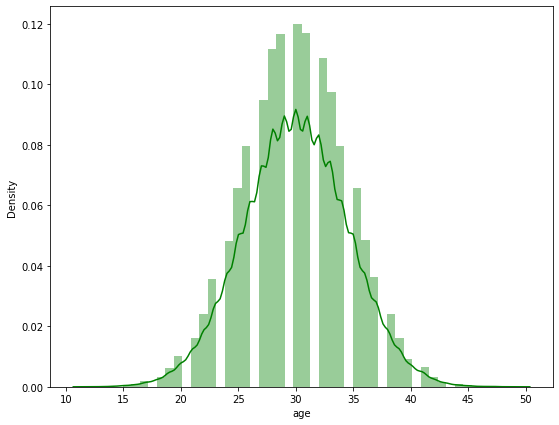

In [149]:
plt.figure(figsize=(9,7))
sns.distplot(df['age'],color='green')
plt.show()

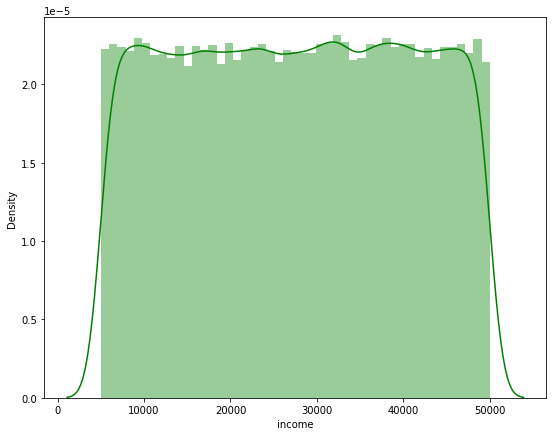

In [150]:
plt.figure(figsize=(9,7))
sns.distplot(df['income'],color='green')
plt.show()

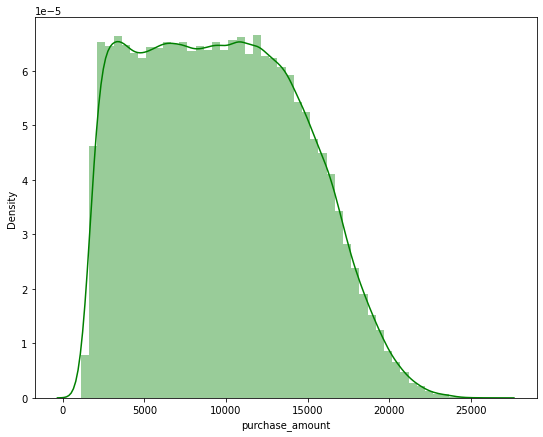

In [151]:
plt.figure(figsize=(9,7))
sns.distplot(df['purchase_amount'],color='green')
plt.show()

In [152]:
cols1=['gender','education','region','loyalty_status','purchase_frequency','product_category','promotion_usage',
      'satisfaction_score']

In [153]:
cols2=['age','income','purchase_amount']

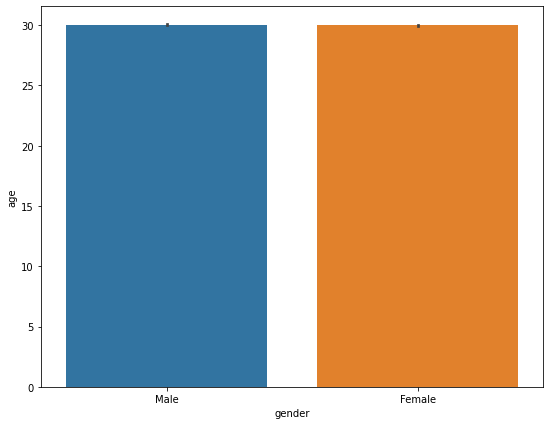

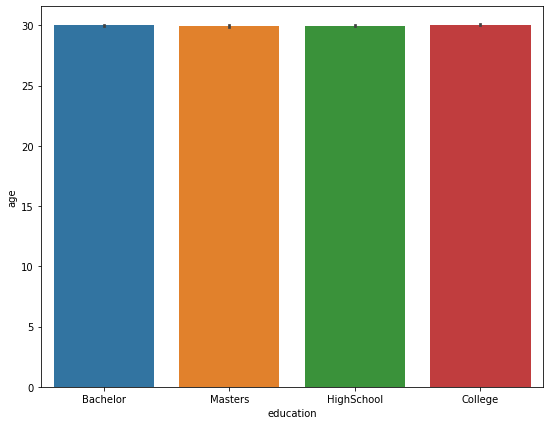

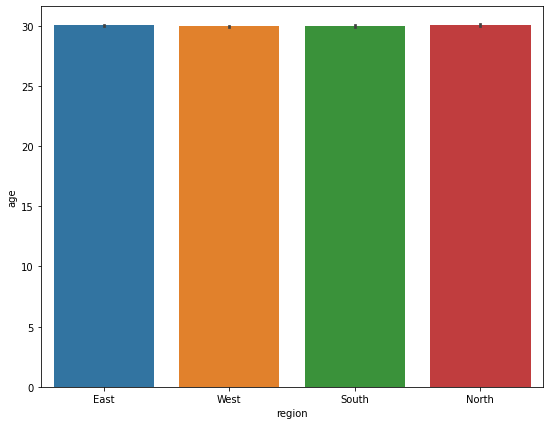

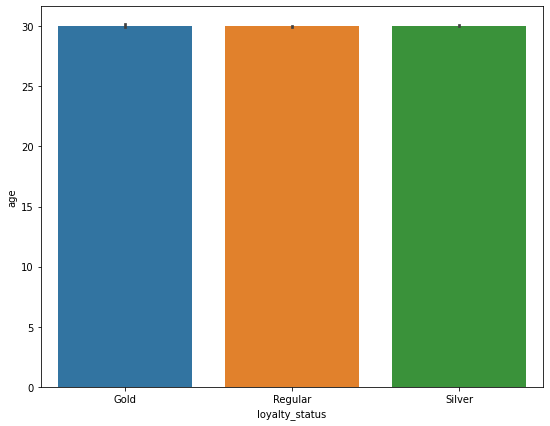

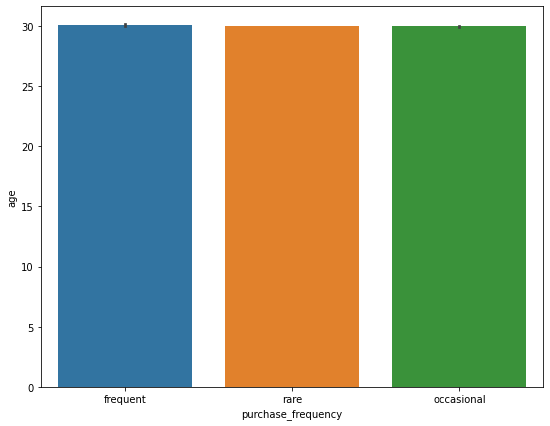

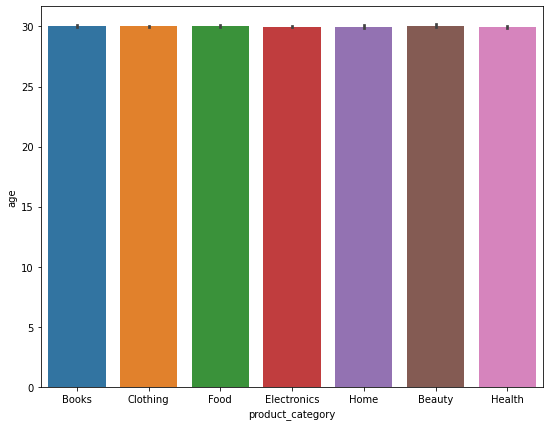

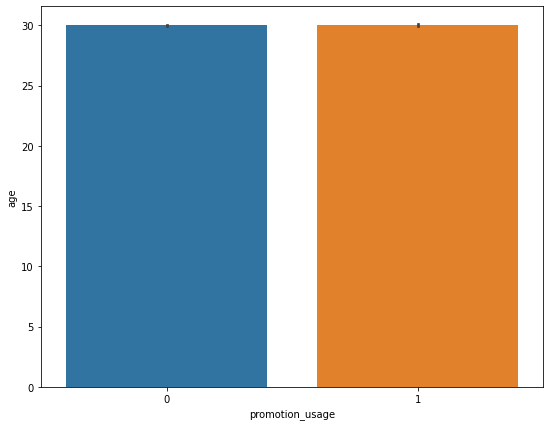

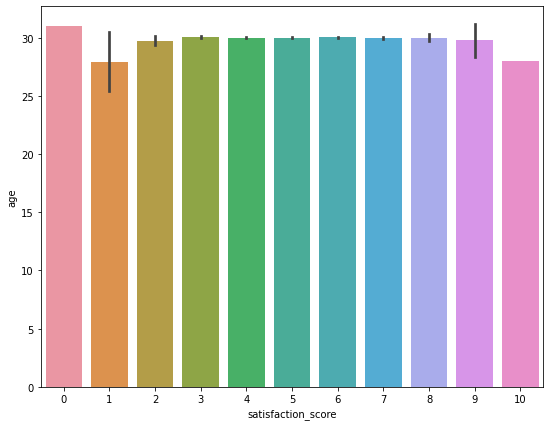

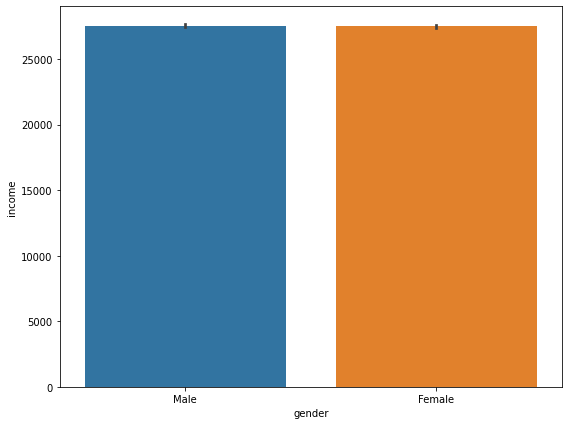

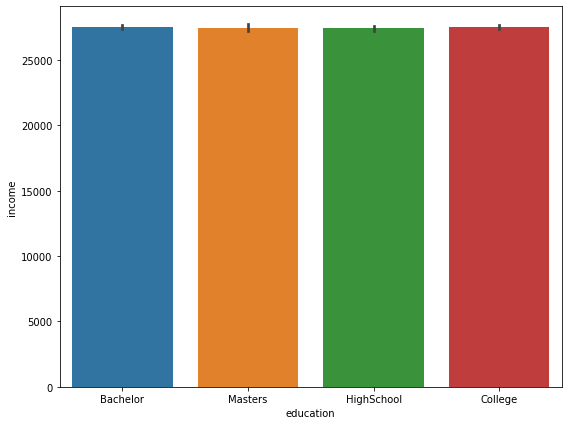

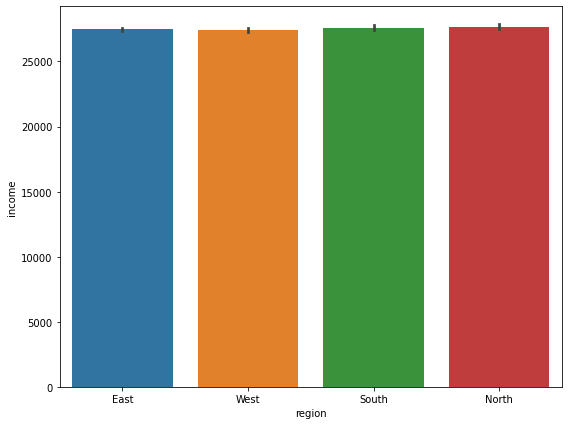

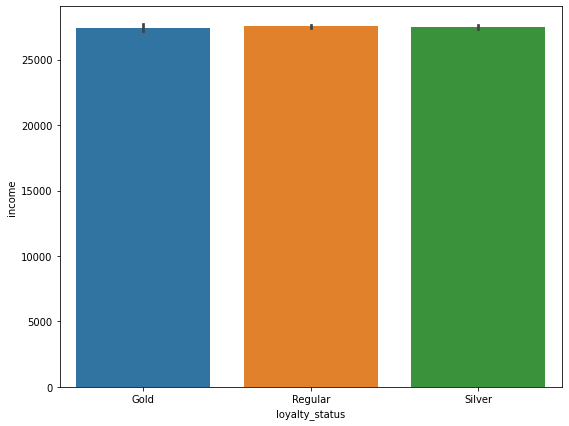

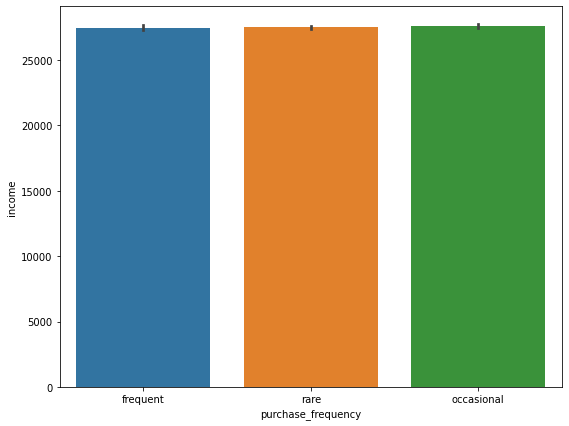

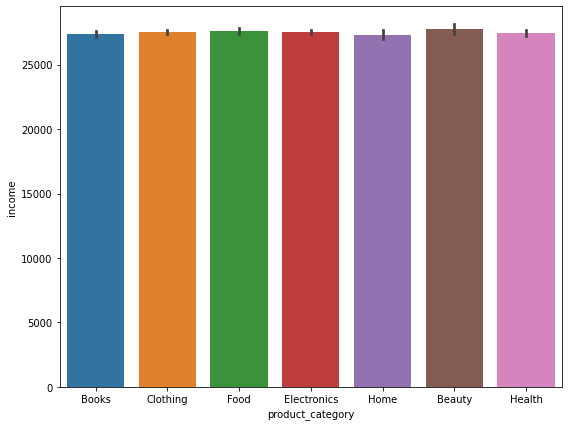

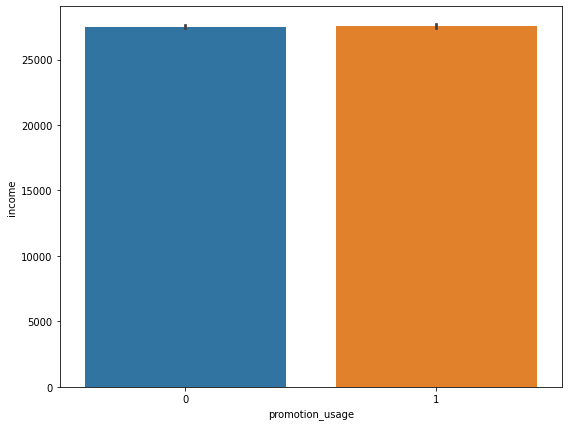

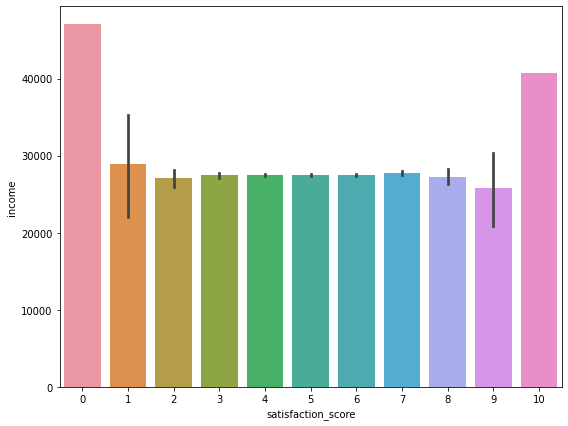

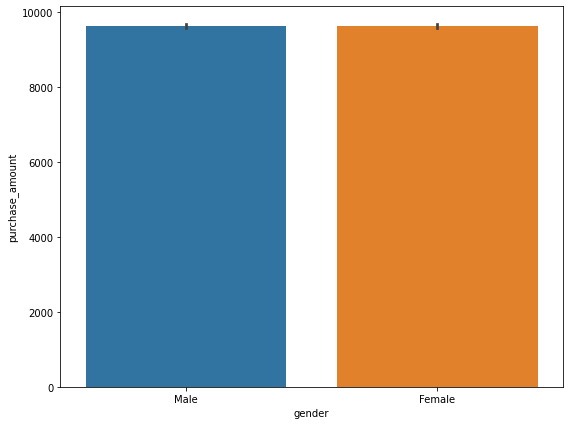

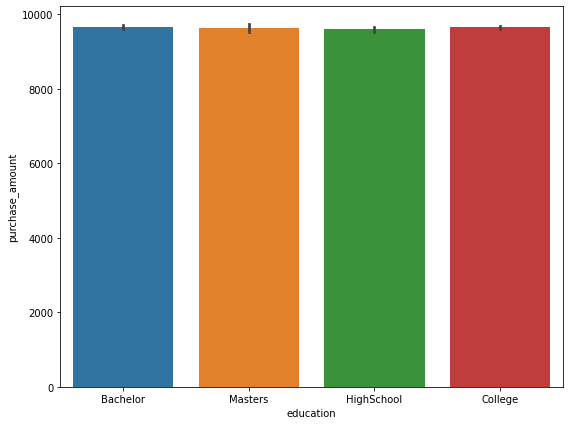

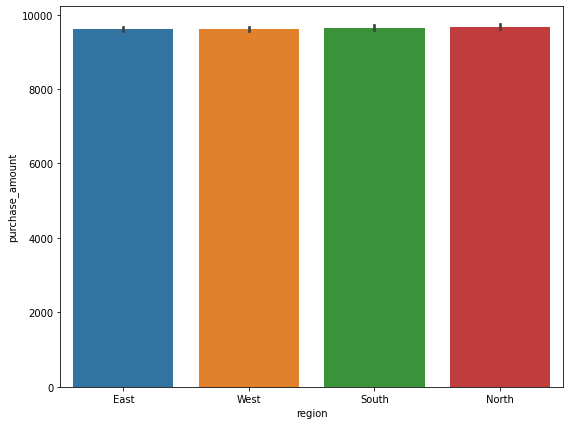

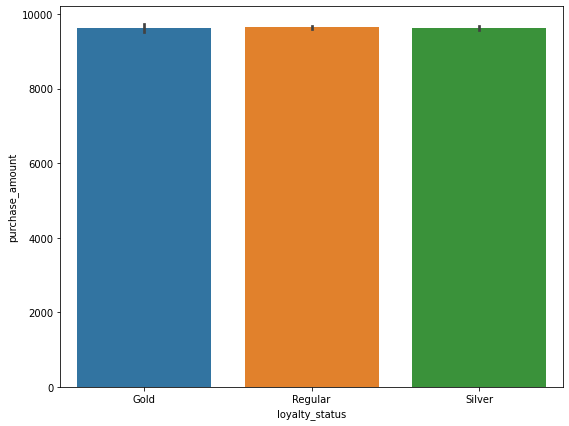

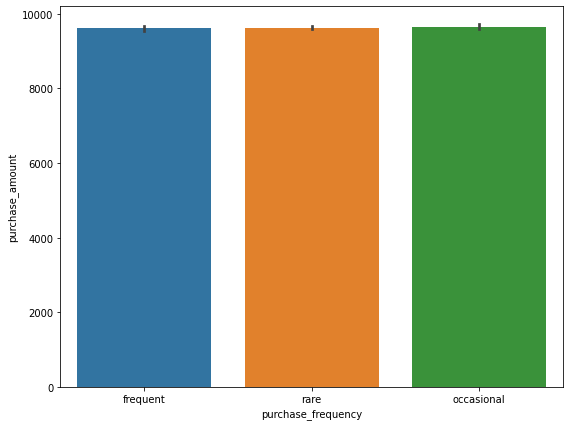

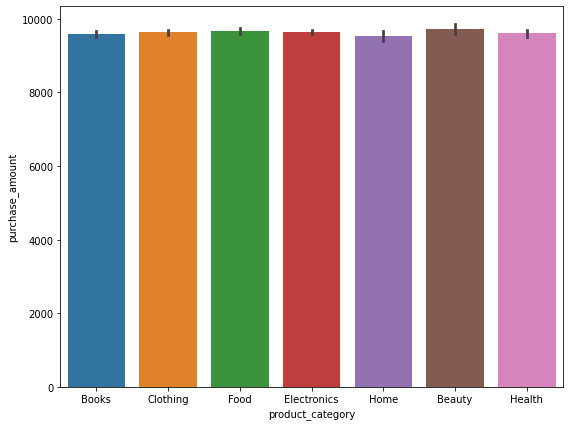

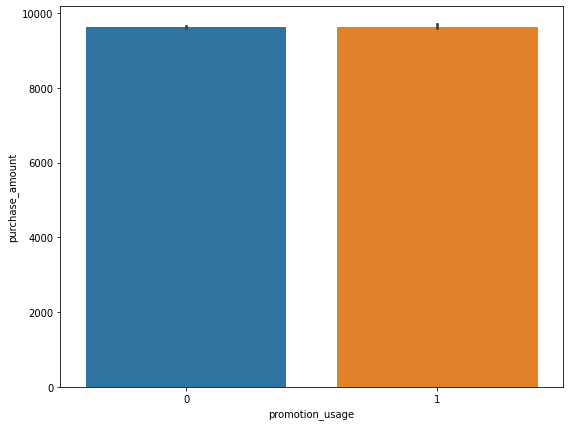

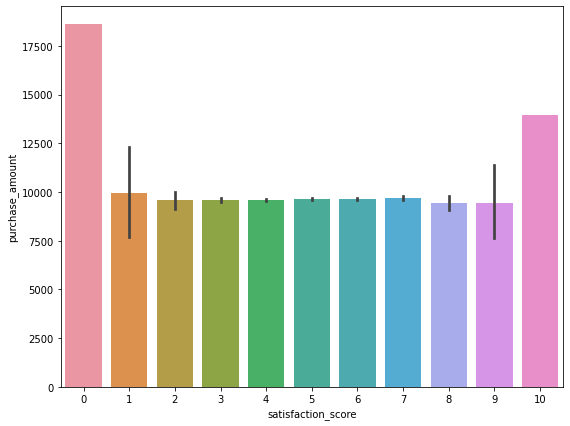

In [154]:
for i in cols2:
    for j in cols1:
        plt.figure(figsize=(9,7))
        sns.barplot(data=df,x=j,y=i)
        plt.show()

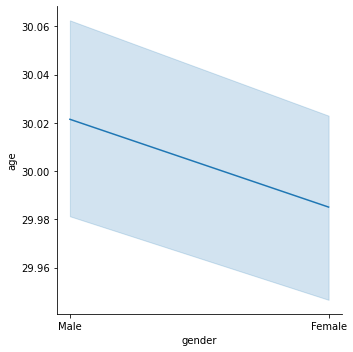

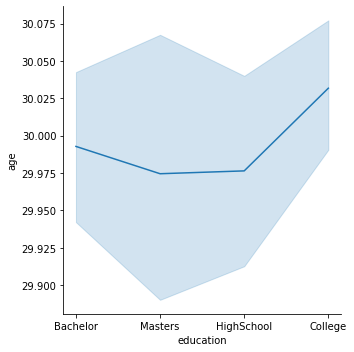

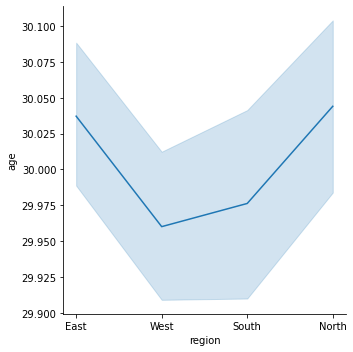

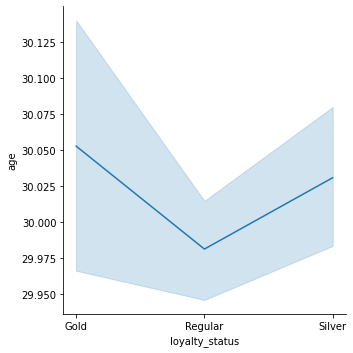

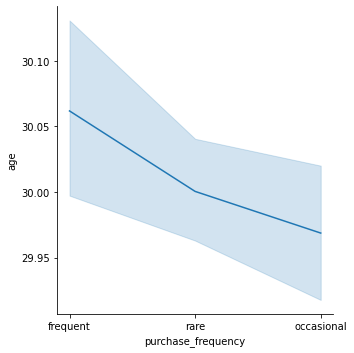

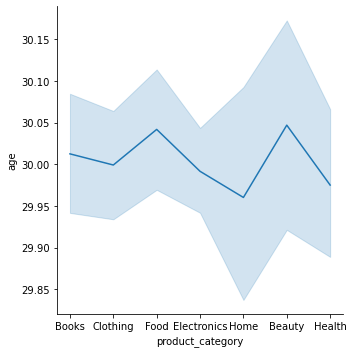

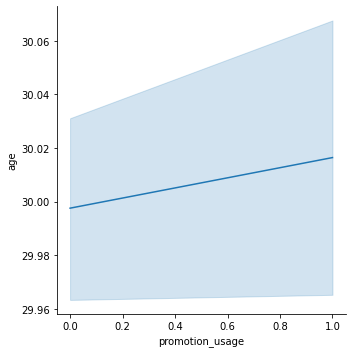

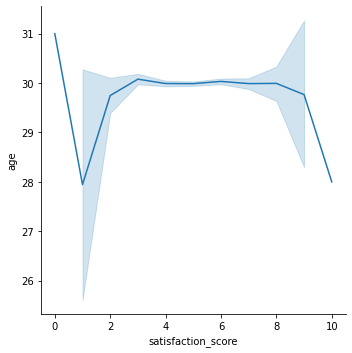

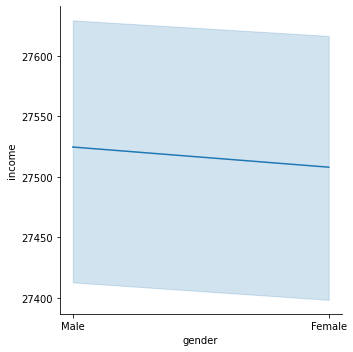

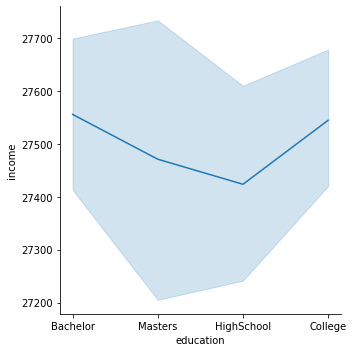

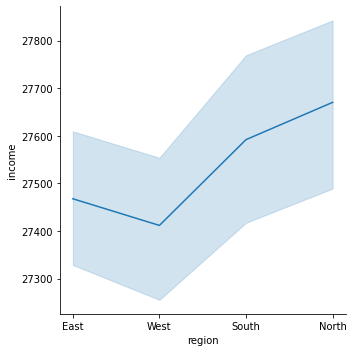

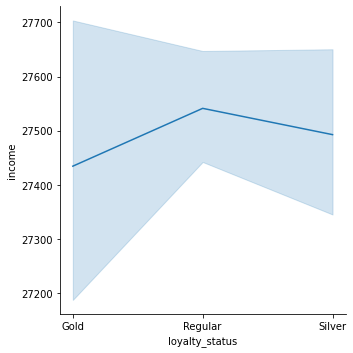

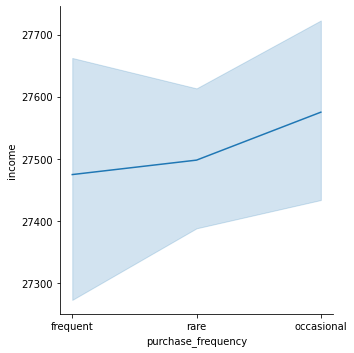

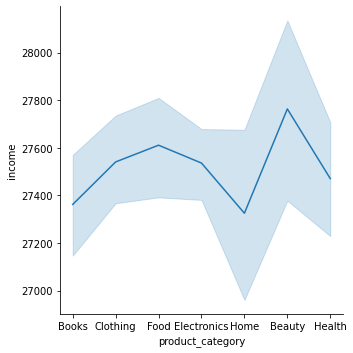

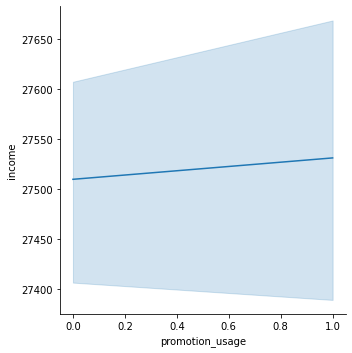

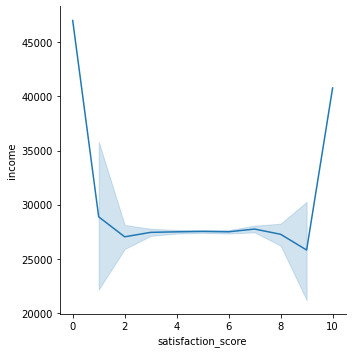

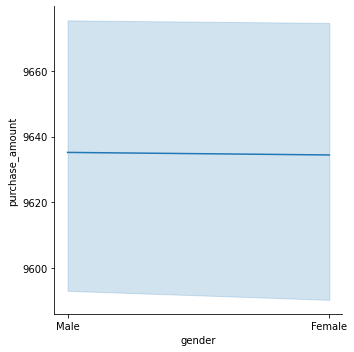

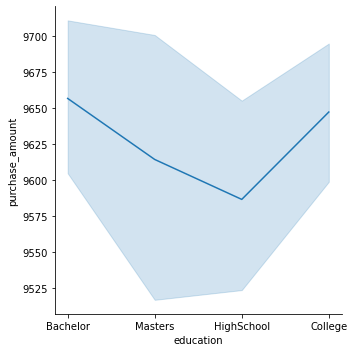

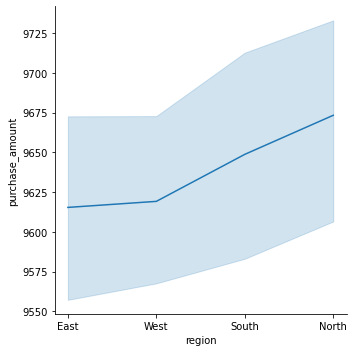

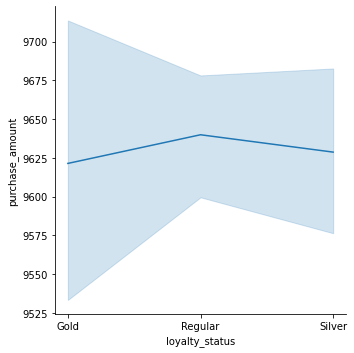

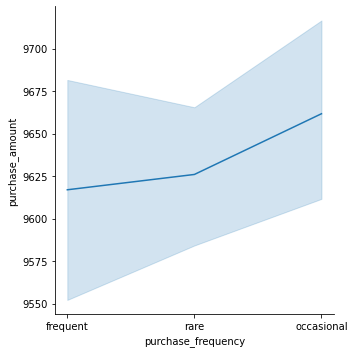

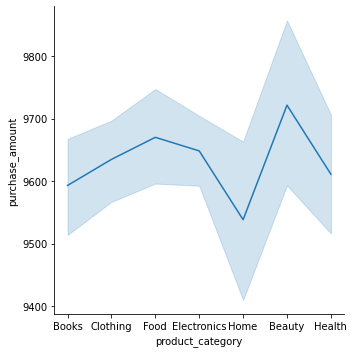

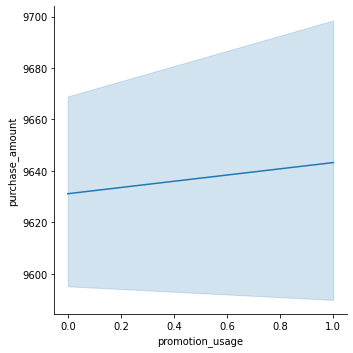

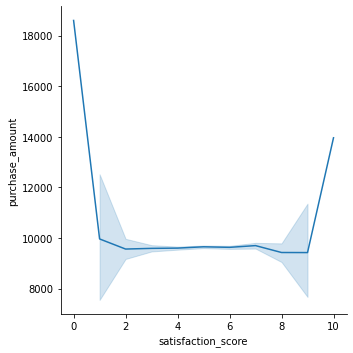

In [155]:
for i in cols2:
    for j in cols1:
        sns.relplot(data=df,x=j,y=i,kind='line')
        plt.show()

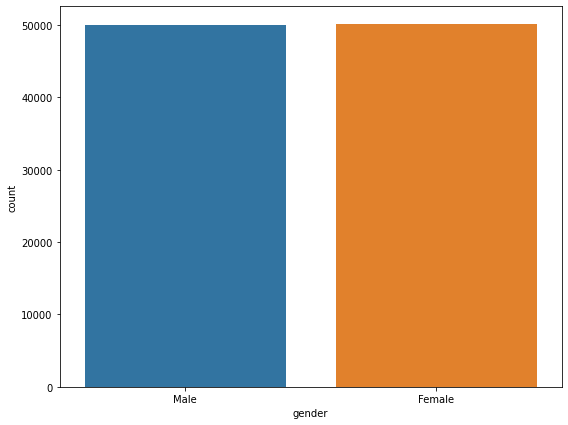

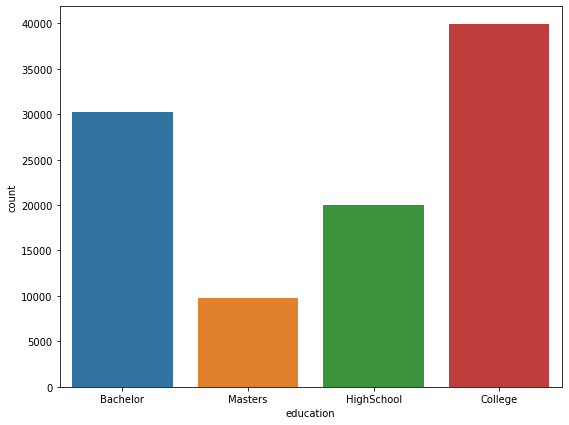

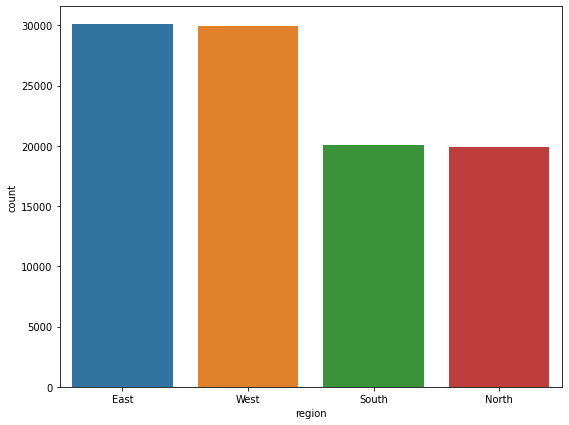

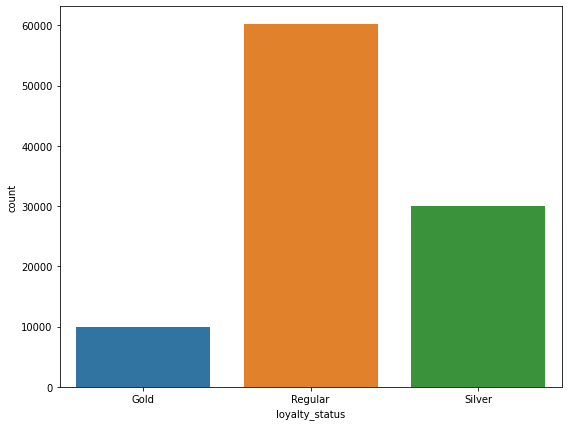

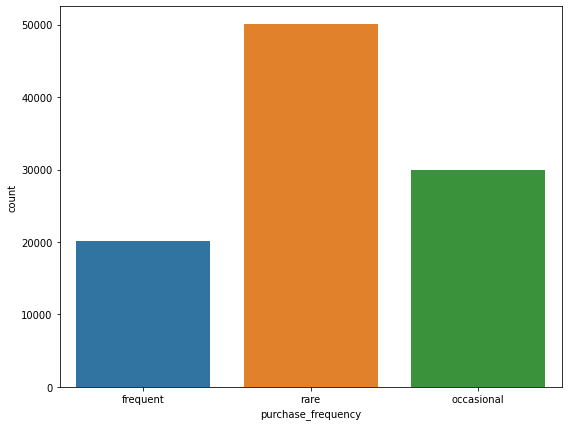

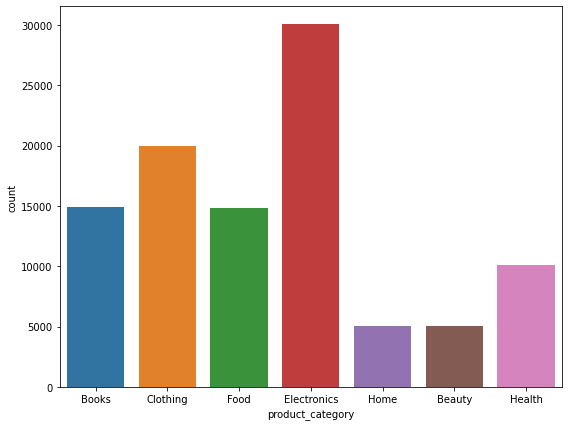

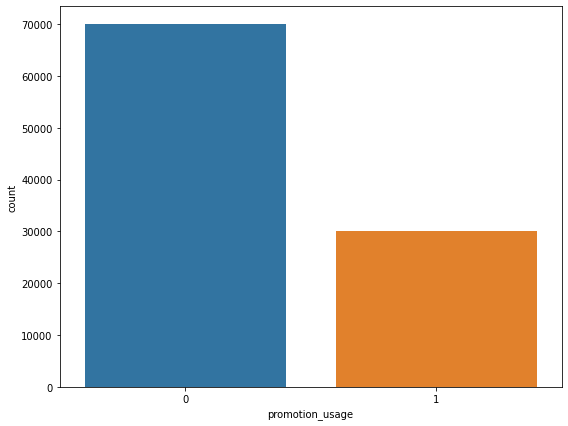

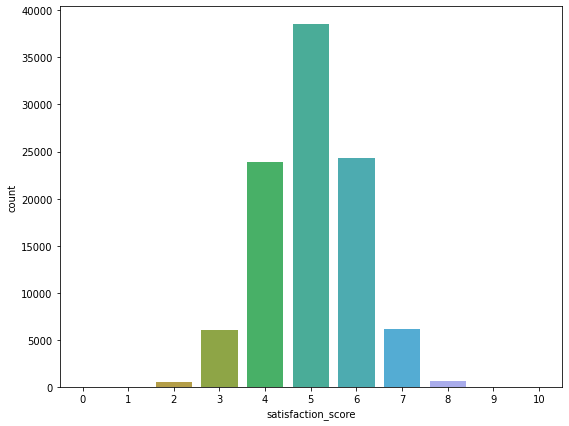

In [156]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.countplot(data=df,x=i)
    plt.show()

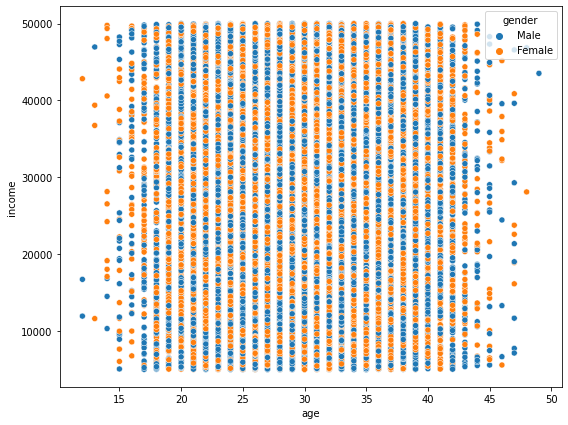

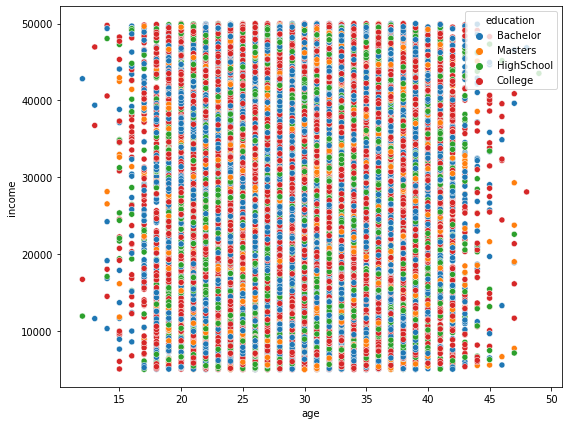

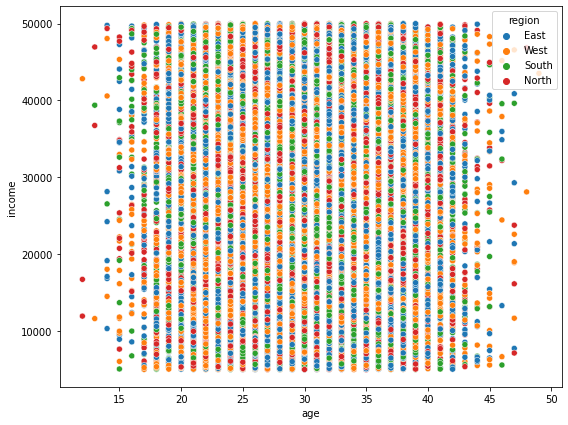

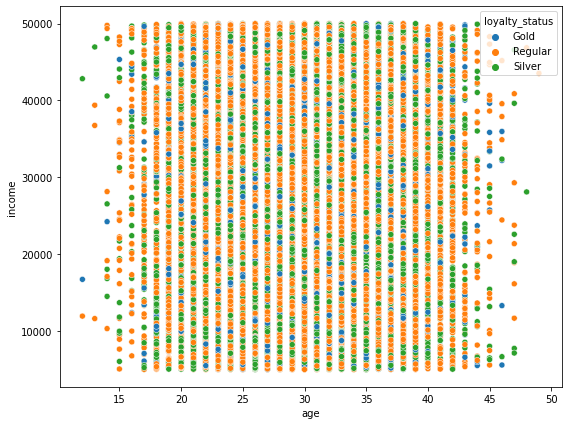

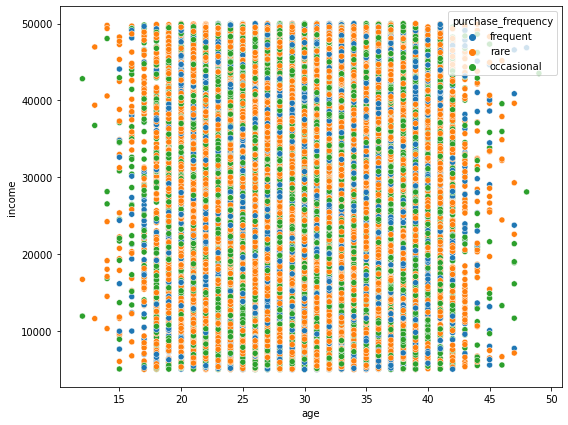

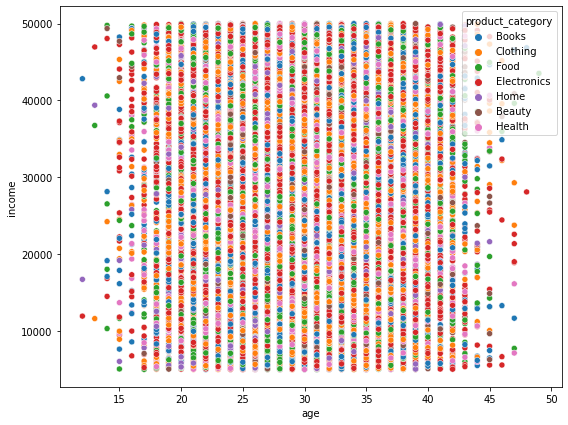

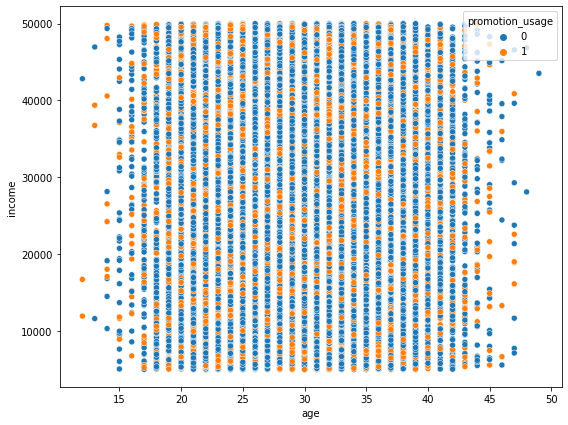

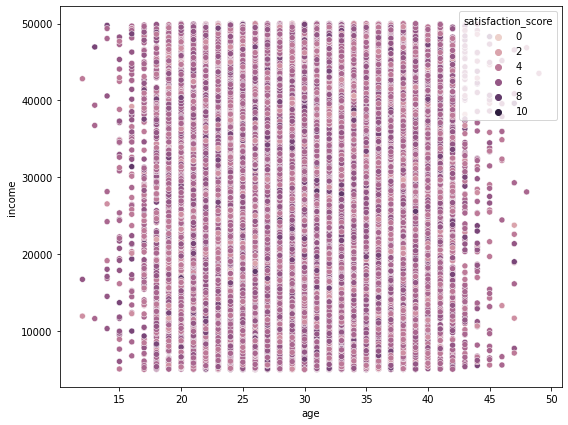

In [157]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='age',y='income',hue=i)
    plt.show()

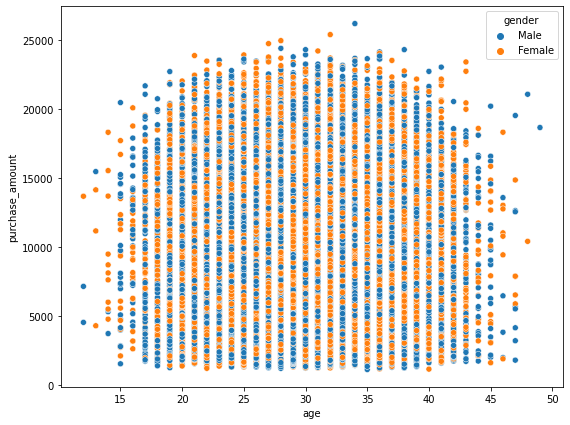

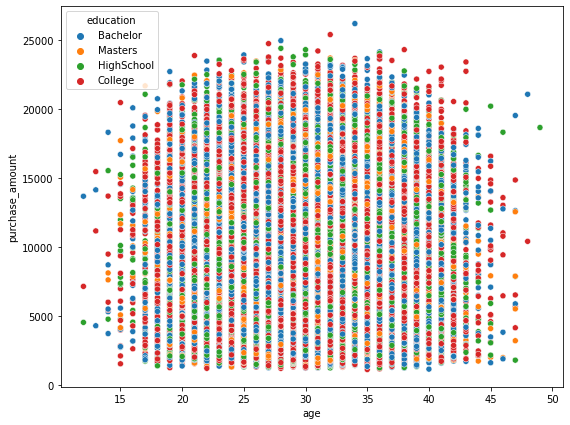

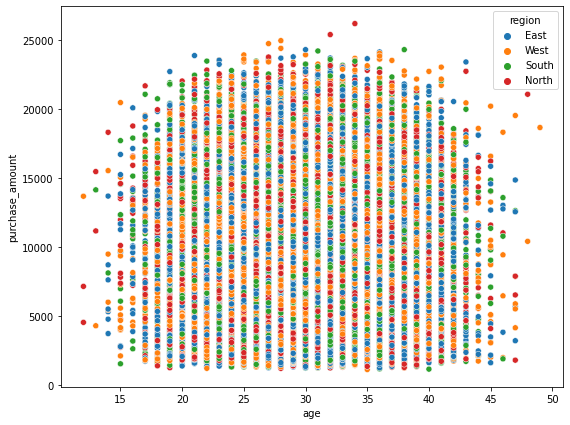

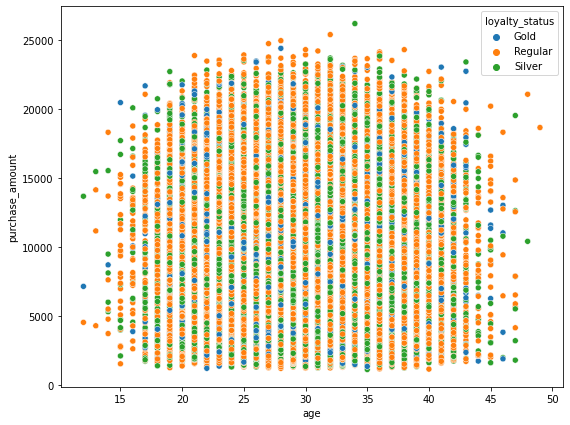

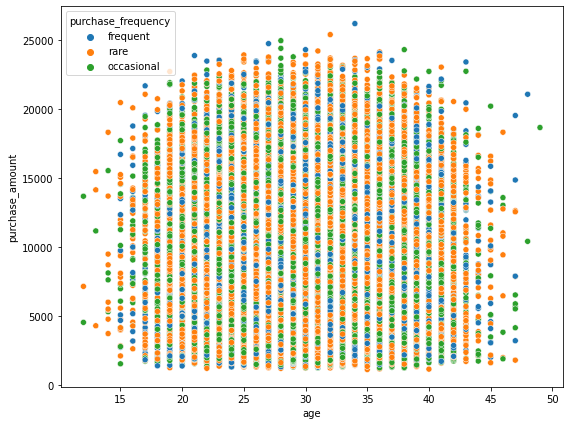

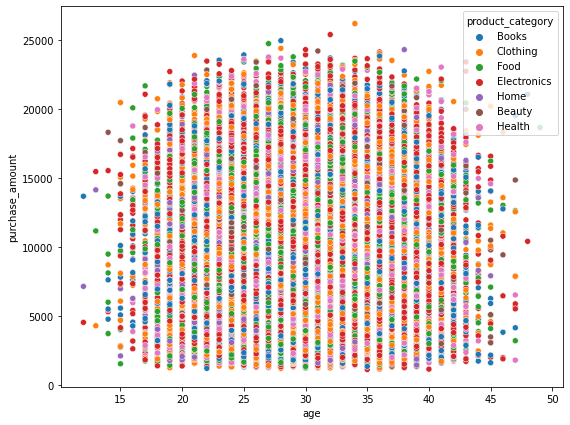

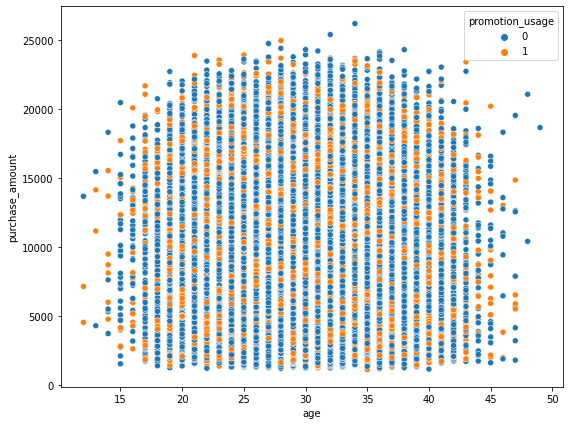

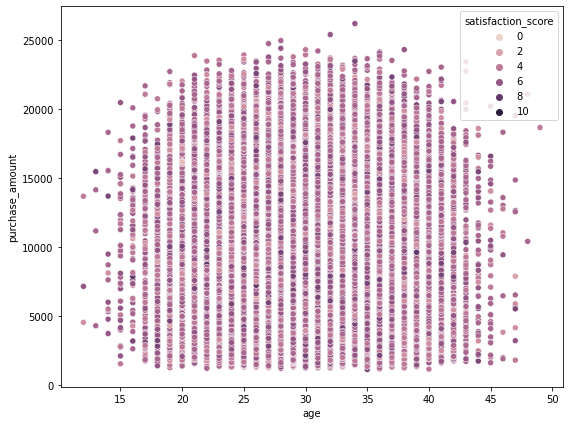

In [158]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='age',y='purchase_amount',hue=i)
    plt.show()

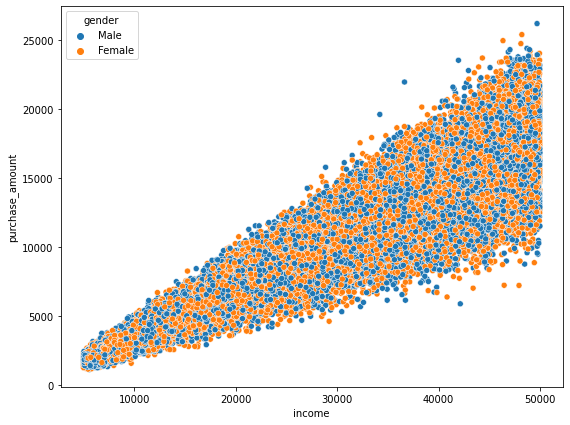

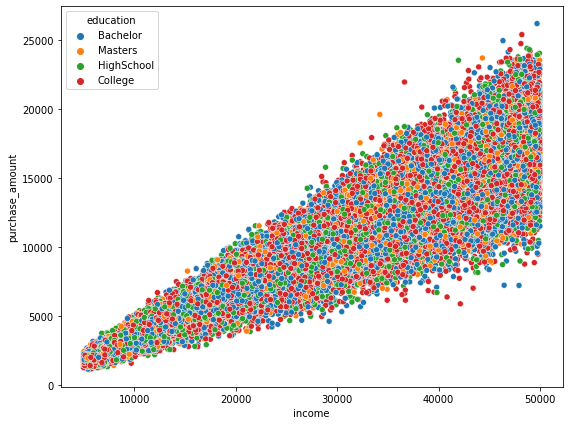

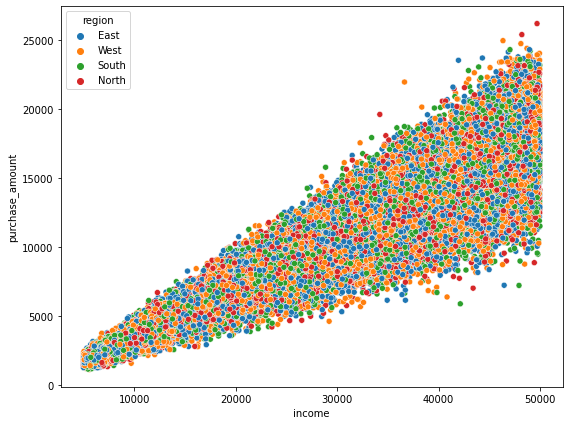

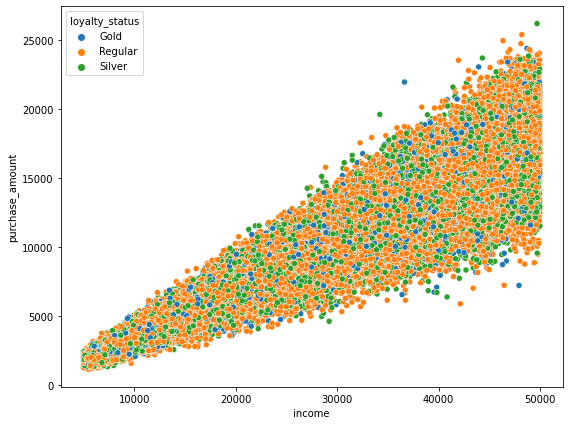

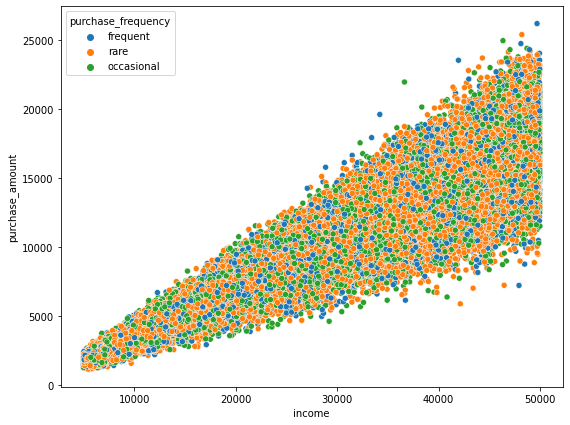

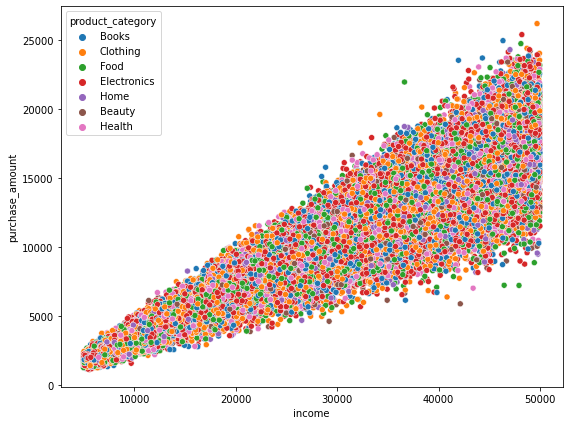

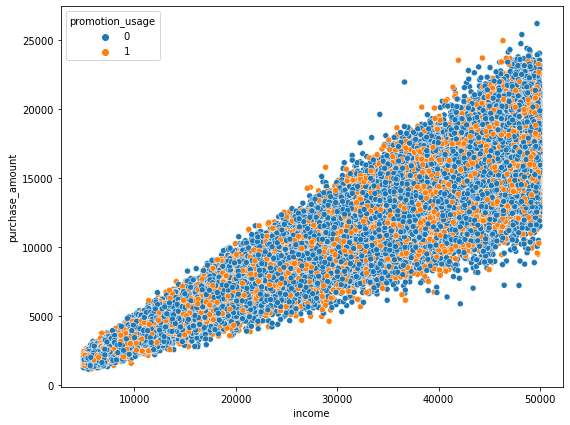

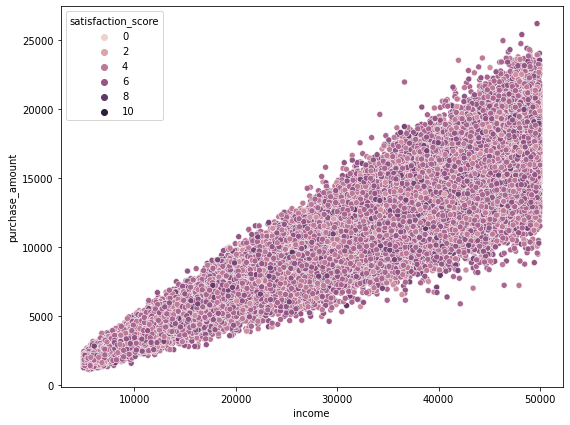

In [159]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='income',y='purchase_amount',hue=i)
    plt.show()

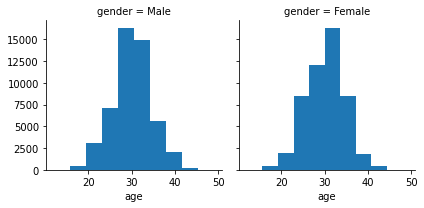

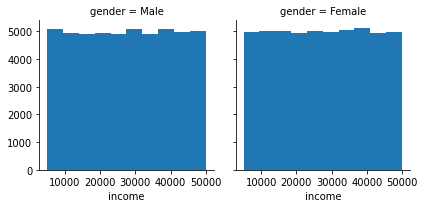

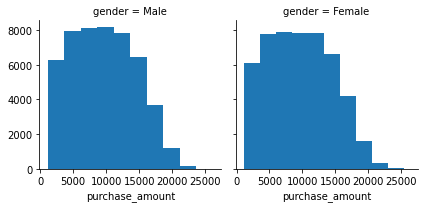

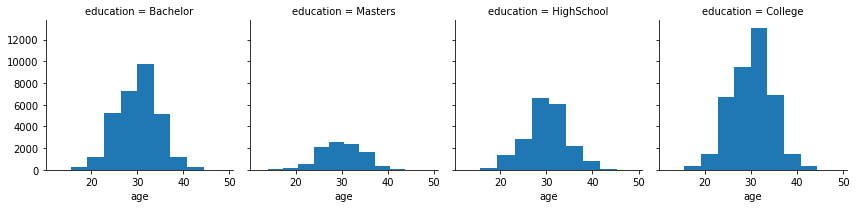

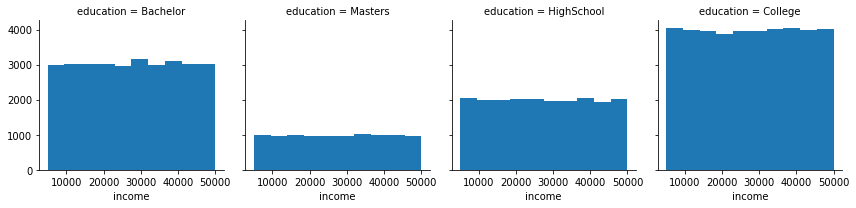

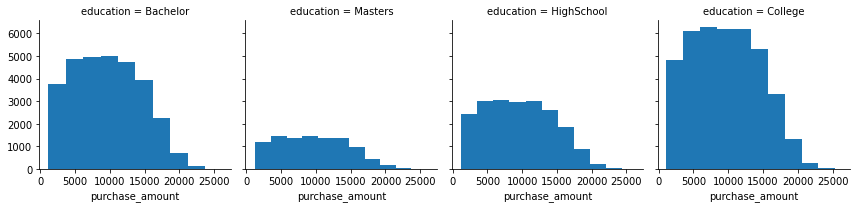

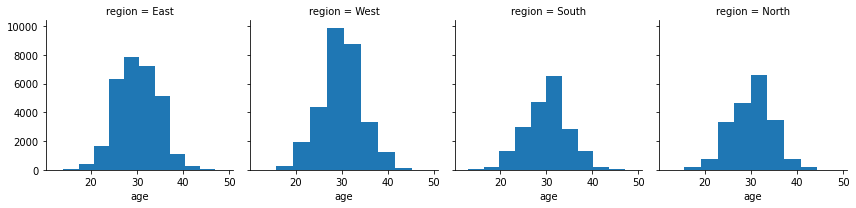

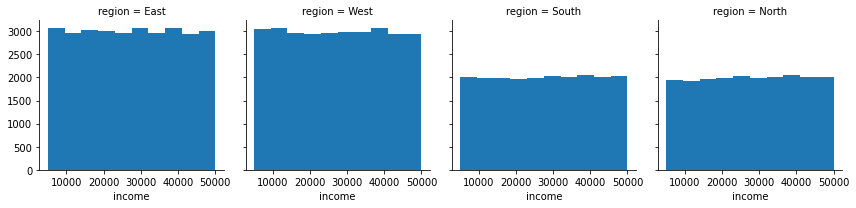

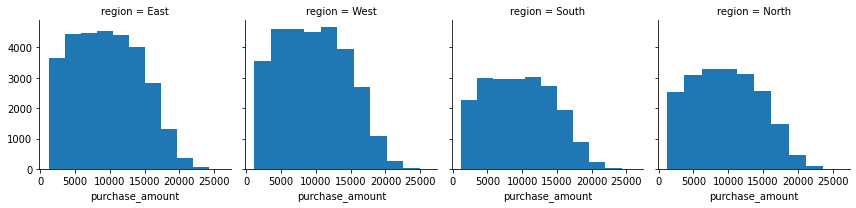

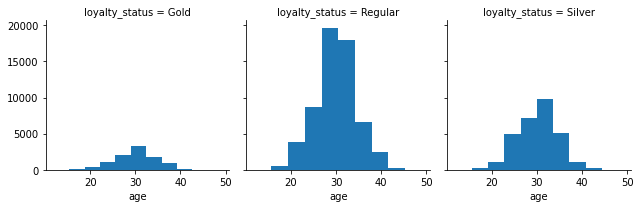

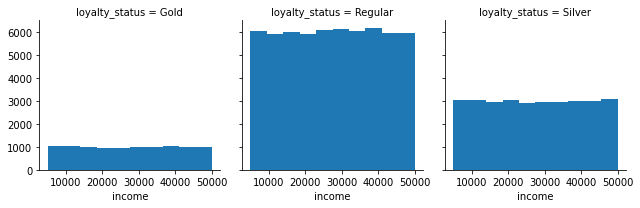

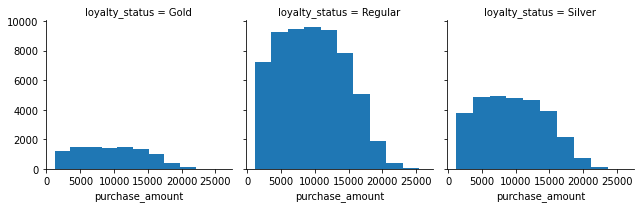

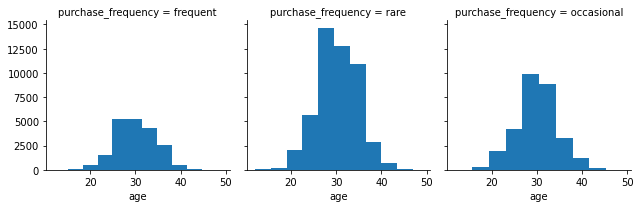

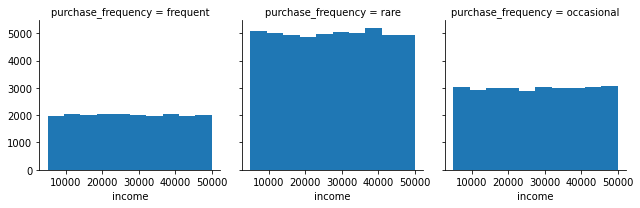

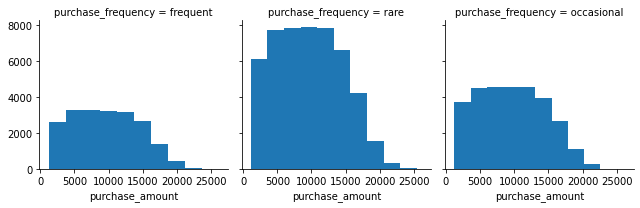

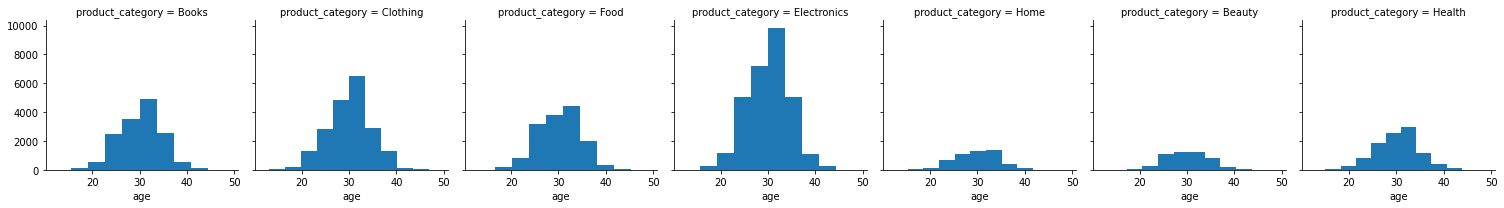

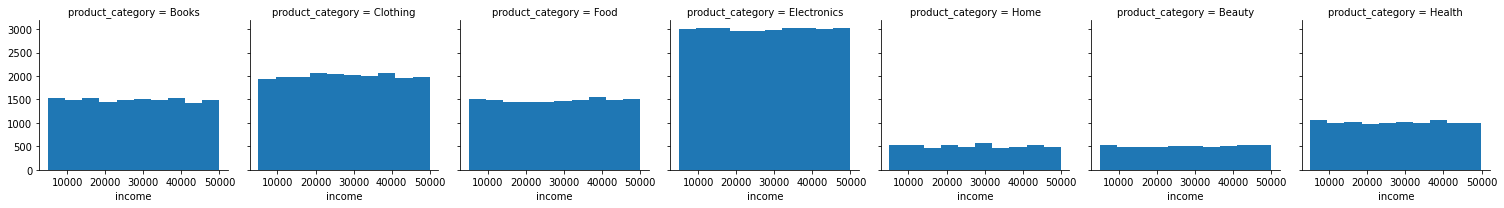

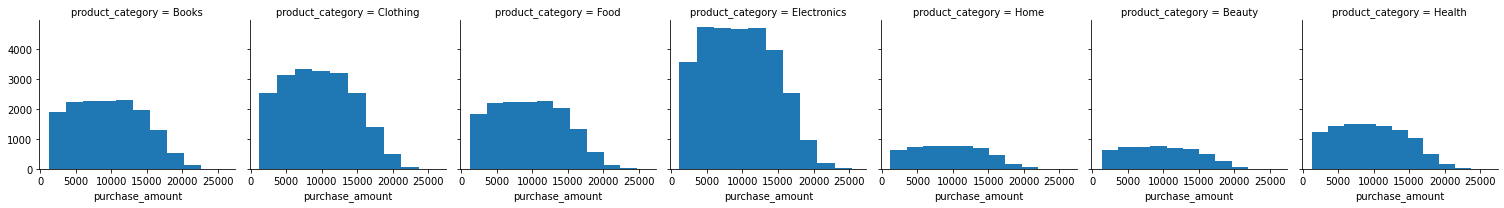

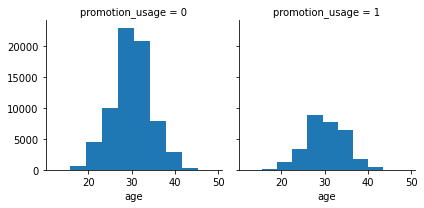

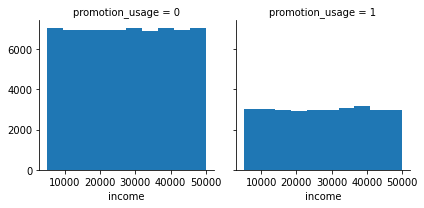

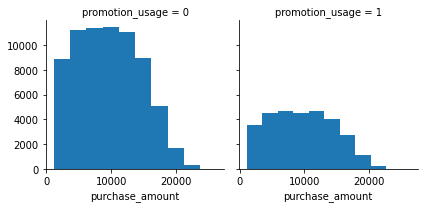

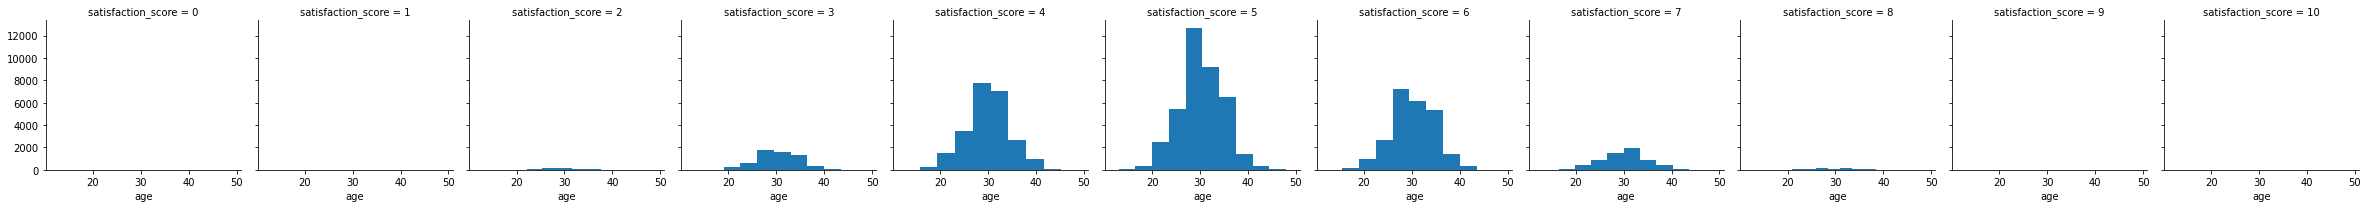

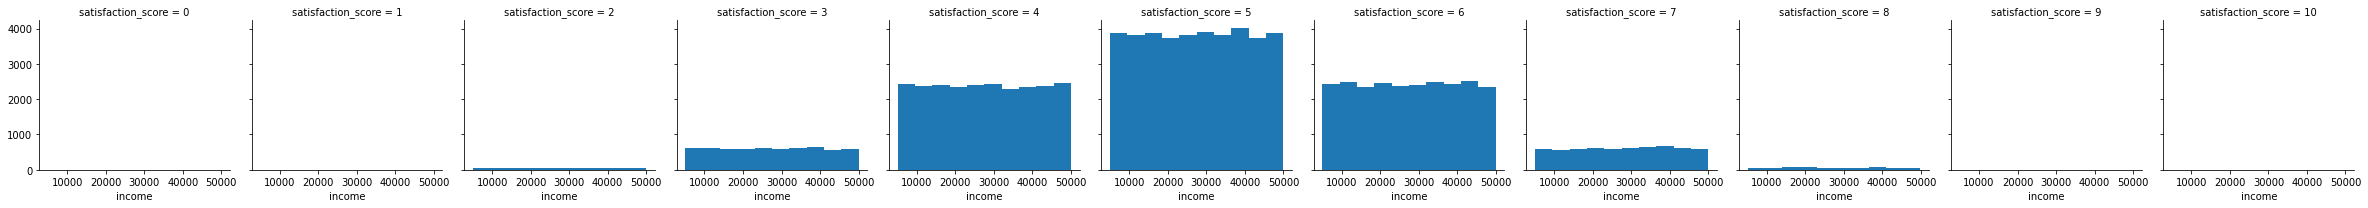

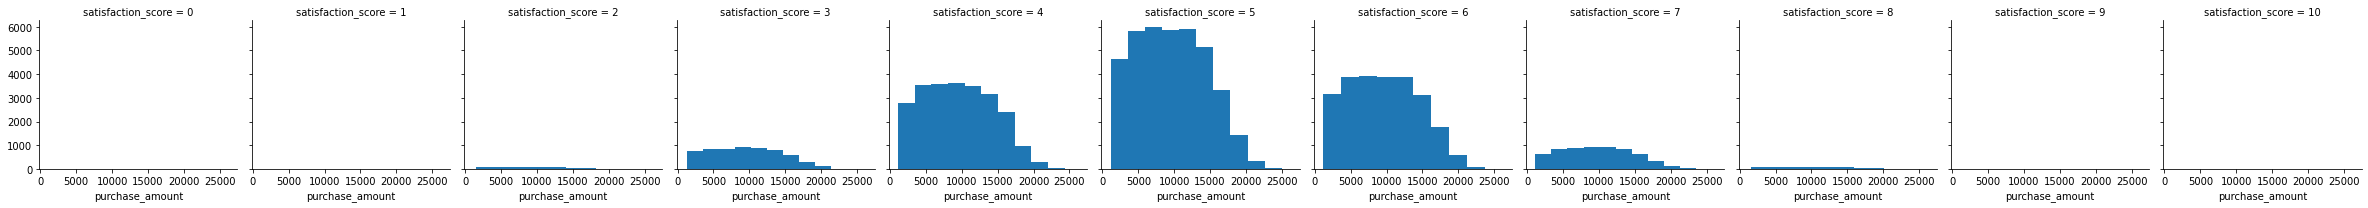

In [160]:
for i in cols1:
    for j in cols2:
        b=sns.FacetGrid(data=df,col=i)
        b.map(plt.hist,j)
        plt.show()

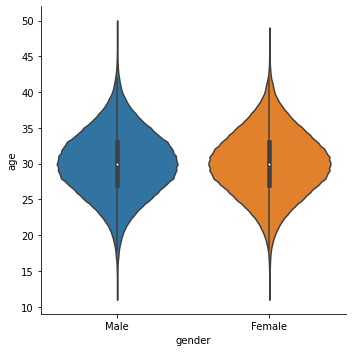

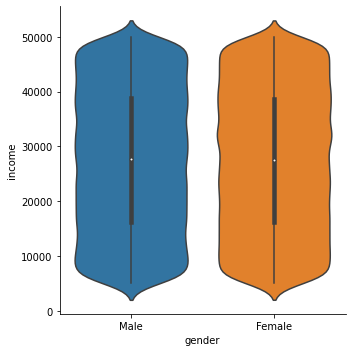

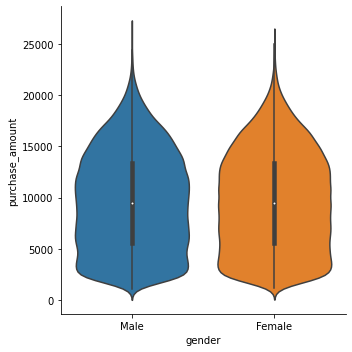

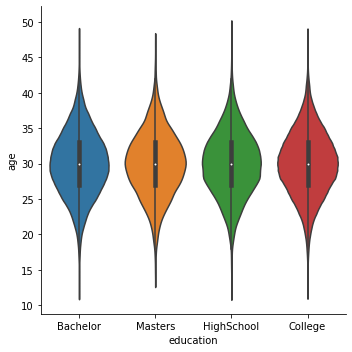

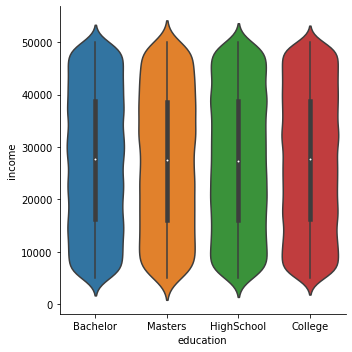

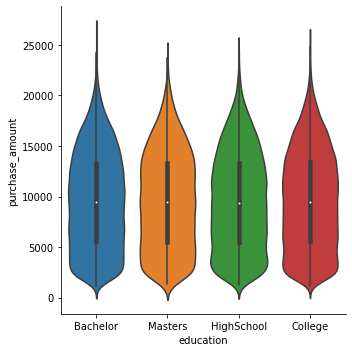

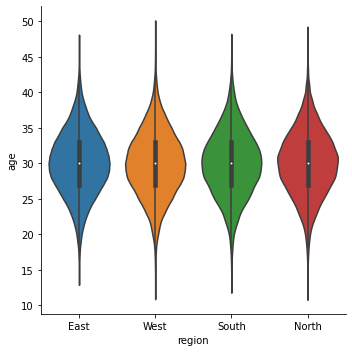

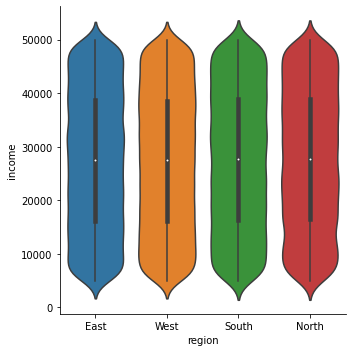

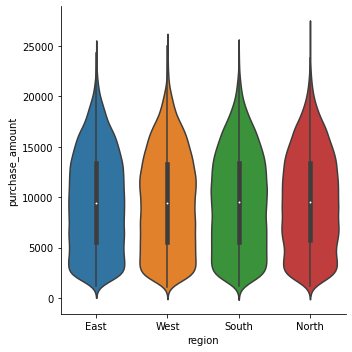

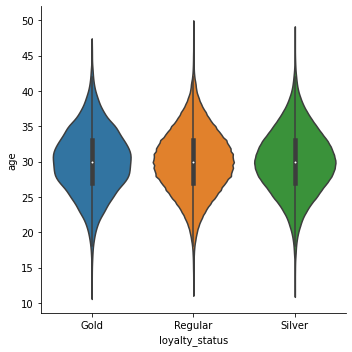

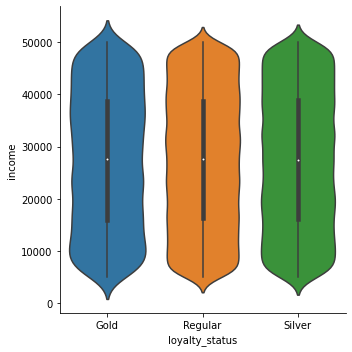

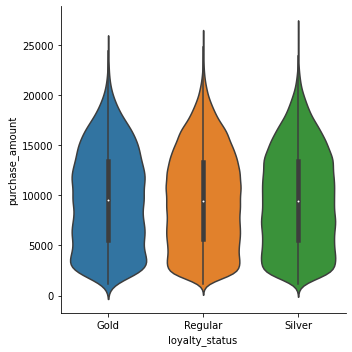

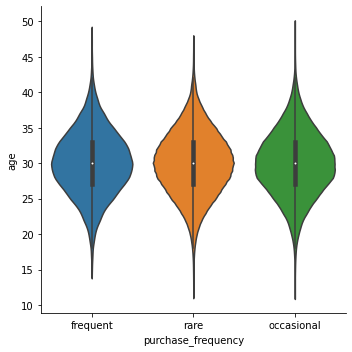

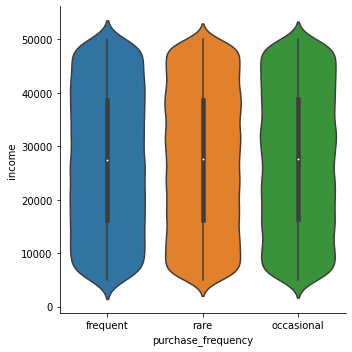

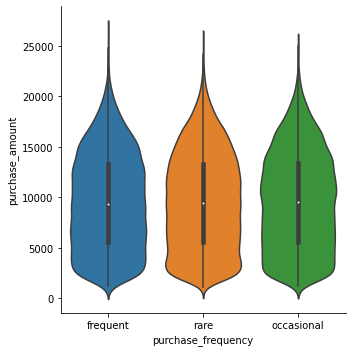

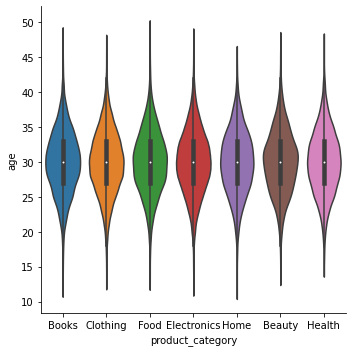

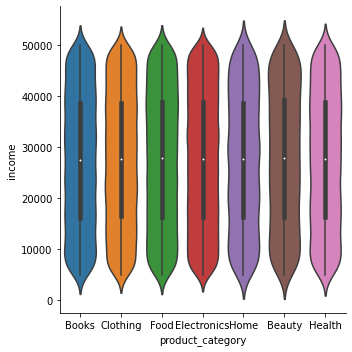

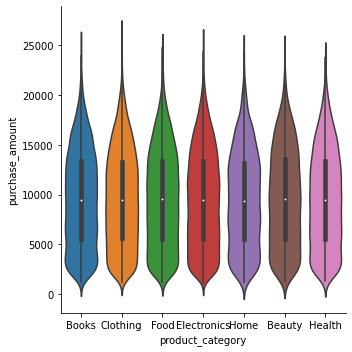

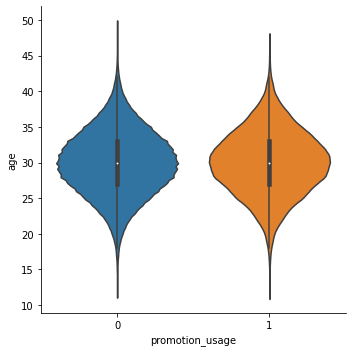

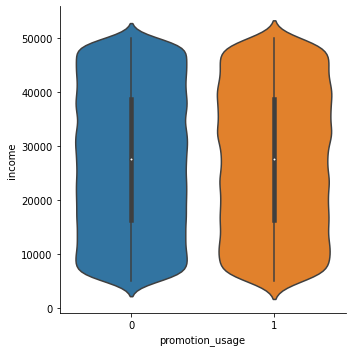

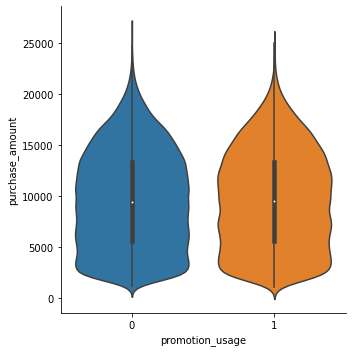

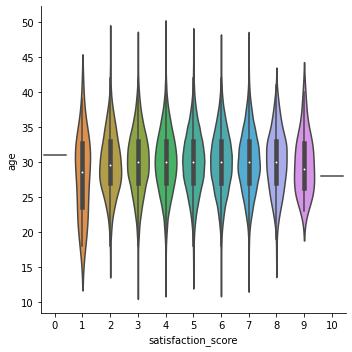

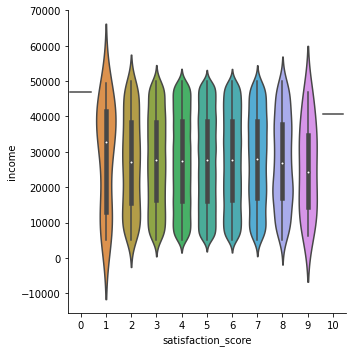

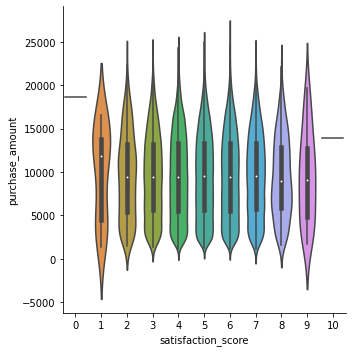

In [161]:
for i in cols1:
    for j in cols2:
        sns.catplot(data=df,x=i,y=j,kind='violin')
        plt.show()

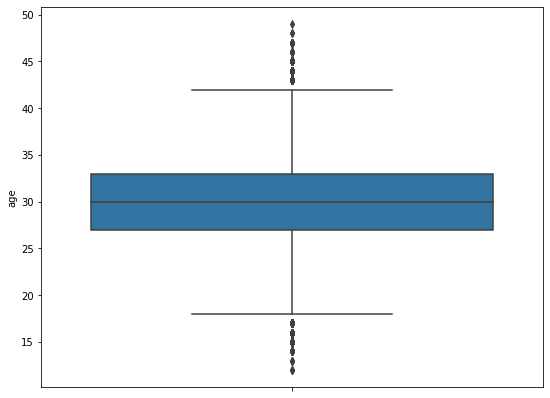

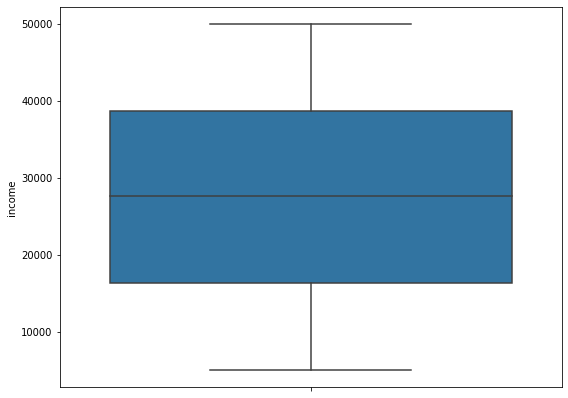

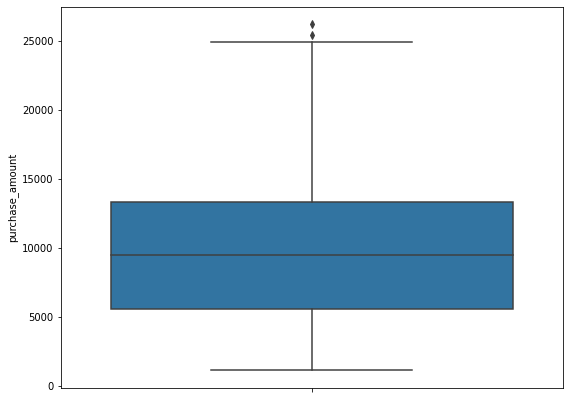

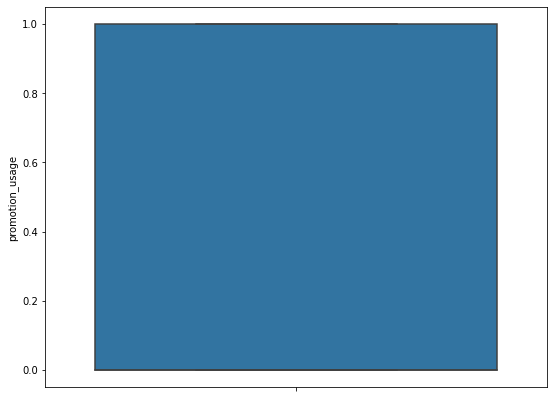

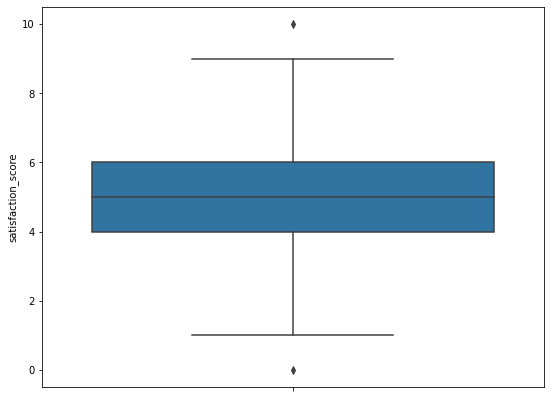

In [162]:
for column in df.columns:
    if df[column].dtype!='object':
        plt.figure(figsize=(9,7))
        sns.boxplot(data=df,y=column)
        plt.show()

In [163]:
df[df['age']>42].shape

(245, 11)

In [164]:
df=df[df['age']<42]

In [165]:
df[df['age']<17].shape

(125, 11)

In [166]:
df=df[df['age']>17]

In [167]:
df[df['purchase_amount']>24000].shape

(10, 11)

In [168]:
df=df[df['purchase_amount']<24000]

In [169]:
df[df['satisfaction_score']==10].shape

(1, 11)

In [170]:
df=df[df['satisfaction_score']<10]

In [171]:
df[df['satisfaction_score']==0].shape

(1, 11)

In [172]:
df=df[df['satisfaction_score']>0]

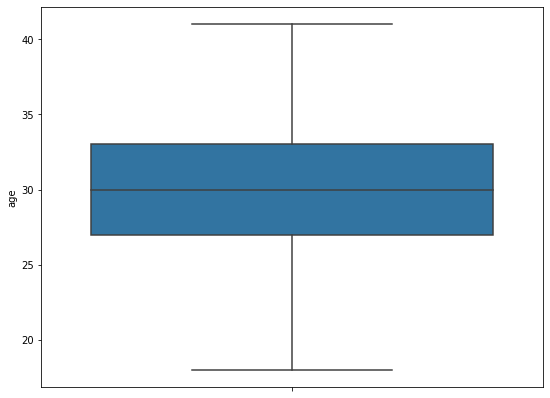

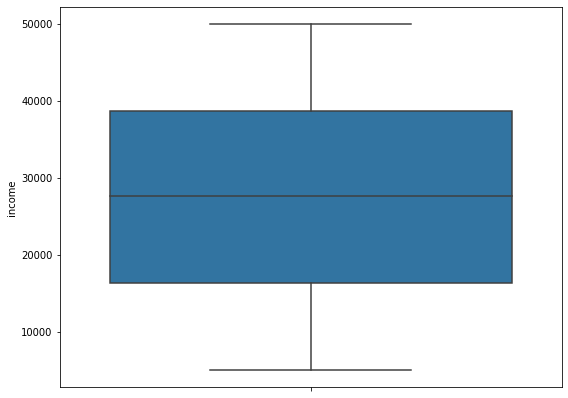

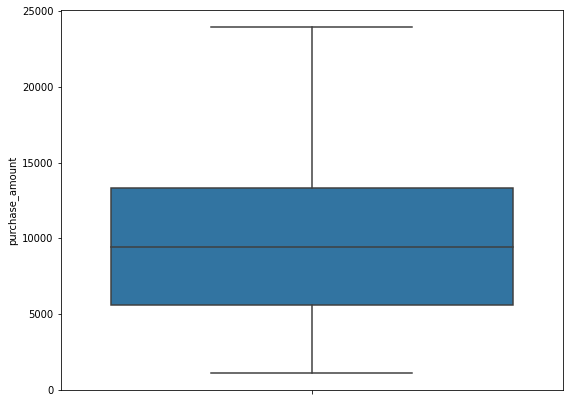

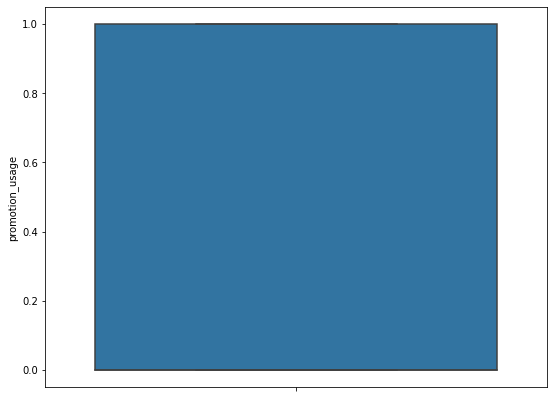

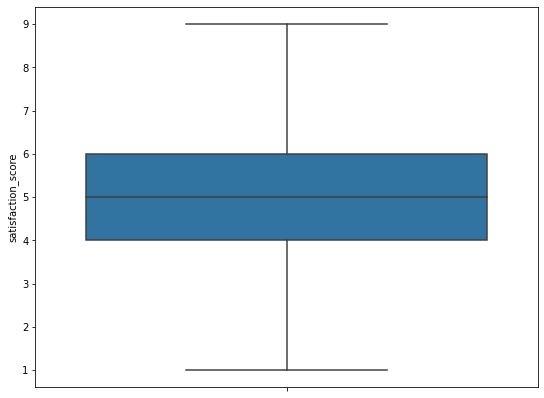

In [173]:
for column in df.columns:
    if df[column].dtype!='object':
        plt.figure(figsize=(9,7))
        sns.boxplot(data=df,y=column)
        plt.show()

In [174]:
df.shape

(99233, 11)

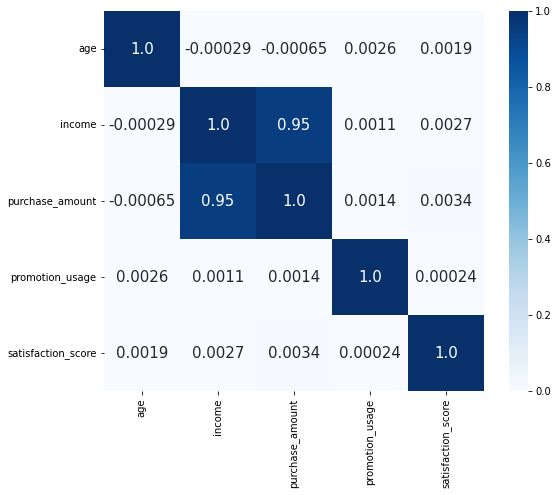

In [175]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [176]:
df.head()

age  gender  income   education region loyalty_status purchase_frequency  \
0   27    Male   40682    Bachelor   East           Gold           frequent   
1   29    Male   15317     Masters   West        Regular               rare   
2   37    Male   38849    Bachelor   West         Silver               rare   
3   30    Male   11568  HighSchool  South        Regular           frequent   
4   31  Female   46952     College  North        Regular         occasional   

   purchase_amount product_category  promotion_usage  satisfaction_score  
0            18249            Books                0                   6  
1             4557         Clothing                1                   6  
2            11822         Clothing                0                   6  
3             4098             Food                0                   7  
4            19685         Clothing                1                   5

In [177]:
categorical_columns=[]
for column in df.columns:
    if df[column].dtype=='object':
        categorical_columns.append(column)

In [178]:
categorical_columns

['gender',
 'education',
 'region',
 'loyalty_status',
 'purchase_frequency',
 'product_category']

In [179]:
df=pd.get_dummies(data=df,columns=categorical_columns,drop_first=True,dtype='int')

In [180]:
df.head()

age  income  purchase_amount  promotion_usage  satisfaction_score  \
0   27   40682            18249                0                   6   
1   29   15317             4557                1                   6   
2   37   38849            11822                0                   6   
3   30   11568             4098                0                   7   
4   31   46952            19685                1                   5   

   gender_Male  education_College  education_HighSchool  education_Masters  \
0            1                  0                     0                  0   
1            1                  0                     0                  1   
2            1                  0                     0                  0   
3            1                  0                     1                  0   
4            0                  1                     0                  0   

   region_North  ...  loyalty_status_Regular  loyalty_status_Silver  \
0             0  ...                       0                      0   
1             0  ...                       1                      0   
2             0  ...                       0                      1   
3             0  ...                       1                      0   
4             1  ...                       1                      0   

   purchase_frequency_occasional  purchase_frequency_rare  \
0                              0                        0   
1                              0                        1   
2                              0                        1   
3                              0                        0   
4                              1                        0   

   product_category_Books  product_category_Clothing  \
0                       1                          0   
1                       0                          1   
2                       0                          1   
3                       0                          0   
4                       0                          1   

   product_category_Electronics  product_category_Food  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      1   
4                             0                      0   

   product_category_Health  product_category_Home  
0                        0                      0  
1                        0                      0  
2                        0                      0  
3                        0                      0  
4                        0                      0  

[5 rows x 22 columns]

In [181]:
df.shape

(99233, 22)

In [182]:
df.columns

Index(['age', 'income', 'purchase_amount', 'promotion_usage',
       'satisfaction_score', 'gender_Male', 'education_College',
       'education_HighSchool', 'education_Masters', 'region_North',
       'region_South', 'region_West', 'loyalty_status_Regular',
       'loyalty_status_Silver', 'purchase_frequency_occasional',
       'purchase_frequency_rare', 'product_category_Books',
       'product_category_Clothing', 'product_category_Electronics',
       'product_category_Food', 'product_category_Health',
       'product_category_Home'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99233 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            99233 non-null  int64
 1   income                         99233 non-null  int64
 2   purchase_amount                99233 non-null  int64
 3   promotion_usage                99233 non-null  int64
 4   satisfaction_score             99233 non-null  int64
 5   gender_Male                    99233 non-null  int32
 6   education_College              99233 non-null  int32
 7   education_HighSchool           99233 non-null  int32
 8   education_Masters              99233 non-null  int32
 9   region_North                   99233 non-null  int32
 10  region_South                   99233 non-null  int32
 11  region_West                    99233 non-null  int32
 12  loyalty_status_Regular         99233 non-null  int32
 13  loyalty_status_Silver

In [184]:
df.std().mean()

809.3820825129005

In [185]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [186]:
df_scaled

array([[-0.6851368 ,  1.01308221,  1.79584623, ..., -0.41707569,
        -0.33558126, -0.23141284],
       [-0.22480232, -0.93862425, -1.05831099, ..., -0.41707569,
        -0.33558126, -0.23141284],
       [ 1.6165356 ,  0.87204227,  0.45611   , ..., -0.41707569,
        -0.33558126, -0.23141284],
       ...,
       [-0.22480232, -1.09982373, -0.93428064, ..., -0.41707569,
        -0.33558126, -0.23141284],
       [ 0.23553216,  0.96776168,  1.39207012, ..., -0.41707569,
         2.97990415, -0.23141284],
       [ 1.15620112, -0.40524245, -0.04334667, ..., -0.41707569,
         2.97990415, -0.23141284]])

In [187]:
df_scaled.std().mean()

0.9999999999999997

In [188]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
pca_df=pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df

PCA1      PCA2
0      1.980276  0.424678
1     -1.423251 -1.077370
2      0.894345  1.981780
3     -1.624071 -1.038604
4      2.622068 -1.022512
...         ...       ...
99228 -0.741622 -1.107461
99229 -0.964917 -1.002616
99230 -1.405741 -1.095181
99231  1.647902 -1.023115
99232 -0.372127  1.925424

[99233 rows x 2 columns]

In [189]:
df_n=df[['income','purchase_amount']]

In [190]:
df_n

income  purchase_amount
0       40682            18249
1       15317             4557
2       38849            11822
3       11568             4098
4       46952            19685
...       ...              ...
99995   19691             7075
99996   17428             6873
99997   13222             5152
99998   40093            16312
99999   22249             9426

[99233 rows x 2 columns]

In [191]:
df_n.std().mean()

8896.810887633403

In [192]:
df_n=scaler.fit_transform(df_n)

In [193]:
df_n

array([[ 1.01308221,  1.79584623],
       [-0.93862425, -1.05831099],
       [ 0.87204227,  0.45611   ],
       ...,
       [-1.09982373, -0.93428064],
       [ 0.96776168,  1.39207012],
       [-0.40524245, -0.04334667]])

In [194]:
df_n.std().mean()

1.0

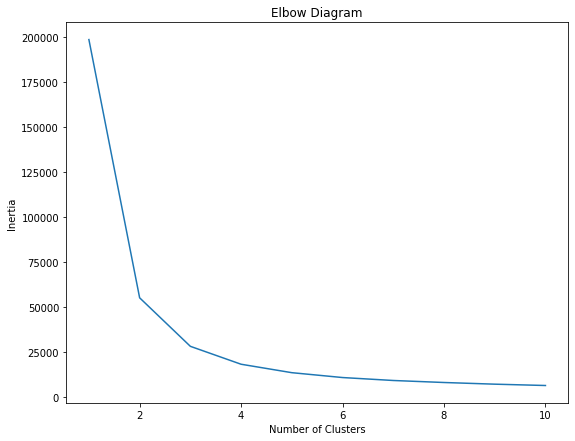

In [195]:
inertia_n=[]
k_n=range(1,11)
for i in k_n:
    kmean_n=KMeans(n_clusters=i,init='k-means++')
    kmean_n.fit(df_n)
    inertia_n.append(kmean_n.inertia_)

plt.figure(figsize=(9,7))
plt.plot(k_n,inertia_n)
plt.title('Elbow Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [196]:
model=KMeans(n_clusters=3,init='k-means++')
y_predict=model.fit_predict(df_n)

In [197]:
y_predict

array([2, 1, 2, ..., 1, 2, 0])

In [198]:
pca_df['Cluster']=y_predict

In [199]:
pca_df.head()

PCA1      PCA2  Cluster
0  1.980276  0.424678        2
1 -1.423251 -1.077370        1
2  0.894345  1.981780        2
3 -1.624071 -1.038604        1
4  2.622068 -1.022512        2

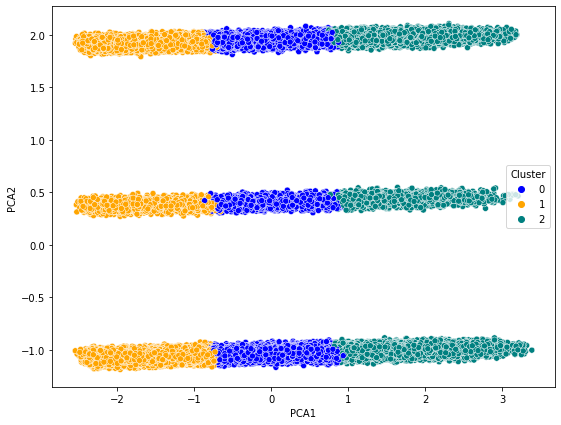

In [200]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='Cluster',palette=['blue','orange','teal'])
plt.show()

In [201]:
df['Cluster']=y_predict

In [202]:
df.sample(5)

age  income  purchase_amount  promotion_usage  satisfaction_score  \
95768   27   26883            11048                0                   5   
9852    30   44692            19439                0                   6   
29307   34   12893             4512                0                   5   
5745    26    5181             1844                0                   4   
38745   31   32527            13749                0                   5   

       gender_Male  education_College  education_HighSchool  \
95768            0                  1                     0   
9852             0                  0                     0   
29307            0                  1                     0   
5745             0                  1                     0   
38745            1                  0                     1   

       education_Masters  region_North  ...  loyalty_status_Silver  \
95768                  0             0  ...                      1   
9852                   1             0  ...                      0   
29307                  0             0  ...                      1   
5745                   0             0  ...                      0   
38745                  0             0  ...                      1   

       purchase_frequency_occasional  purchase_frequency_rare  \
95768                              0                        0   
9852                               0                        0   
29307                              0                        0   
5745                               0                        1   
38745                              0                        1   

       product_category_Books  product_category_Clothing  \
95768                       0                          0   
9852                        1                          0   
29307                       1                          0   
5745                        0                          0   
38745                       0                          1   

       product_category_Electronics  product_category_Food  \
95768                             1                      0   
9852                              0                      0   
29307                             0                      0   
5745                              1                      0   
38745                             0                      0   

       product_category_Health  product_category_Home  Cluster  
95768                        0                      0        0  
9852                         0                      0        2  
29307                        0                      0        1  
5745                         0                      0        1  
38745                        0                      0        2  

[5 rows x 23 columns]

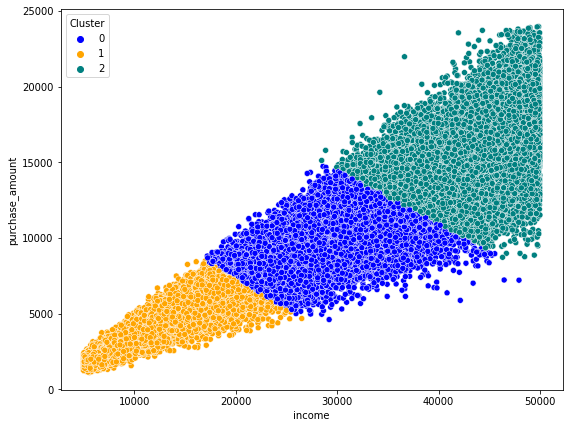

In [203]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='income',y='purchase_amount',hue='Cluster',palette=['blue','orange','teal'])
plt.show()

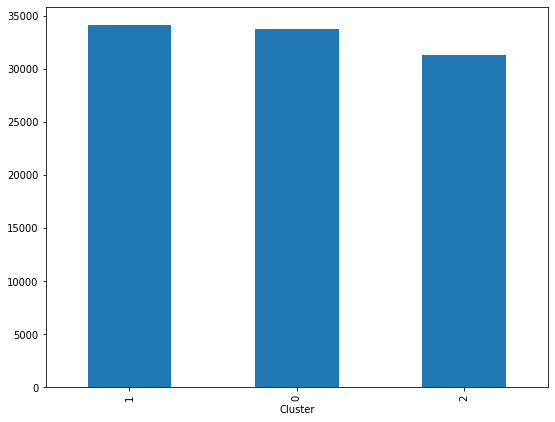

In [204]:
df['Cluster'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [205]:
X=df_scaled
y=df['Cluster']

In [206]:
X

array([[-0.6851368 ,  1.01308221,  1.79584623, ..., -0.41707569,
        -0.33558126, -0.23141284],
       [-0.22480232, -0.93862425, -1.05831099, ..., -0.41707569,
        -0.33558126, -0.23141284],
       [ 1.6165356 ,  0.87204227,  0.45611   , ..., -0.41707569,
        -0.33558126, -0.23141284],
       ...,
       [-0.22480232, -1.09982373, -0.93428064, ..., -0.41707569,
        -0.33558126, -0.23141284],
       [ 0.23553216,  0.96776168,  1.39207012, ..., -0.41707569,
         2.97990415, -0.23141284],
       [ 1.15620112, -0.40524245, -0.04334667, ..., -0.41707569,
         2.97990415, -0.23141284]])

In [207]:
X.shape

(99233, 22)

In [208]:
y

0        2
1        1
2        2
3        1
4        2
        ..
99995    1
99996    1
99997    1
99998    2
99999    0
Name: Cluster, Length: 99233, dtype: int32

In [209]:
len(y)

99233

In [210]:
y.value_counts()

Cluster
1    34123
0    33765
2    31345
Name: count, dtype: int64

In [212]:
smote=SMOTE(sampling_strategy='minority')

In [213]:
X_sm,y_sm=smote.fit_resample(X,y)

In [214]:
y_sm.value_counts()

Cluster
2    34123
1    34123
0    33765
Name: count, dtype: int64

In [215]:
X_sm,y_sm=smote.fit_resample(X_sm,y_sm)

In [216]:
y_sm.value_counts()

Cluster
2    34123
1    34123
0    34123
Name: count, dtype: int64

In [217]:
len(X_sm)

102369

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=101,stratify=y_sm,shuffle=True)

In [221]:
len(X_train)

81895

In [222]:
len(X_test)

20474

In [223]:
y_train.value_counts()

Cluster
2    27299
1    27298
0    27298
Name: count, dtype: int64

In [224]:
y_test.value_counts()

Cluster
0    6825
1    6825
2    6824
Name: count, dtype: int64

In [225]:
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [226]:
y_preds=dtc_model.predict(X_test)

In [228]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6824
           1       1.00      1.00      1.00      6824
           2       1.00      1.00      1.00      6826

    accuracy                           1.00     20474
   macro avg       1.00      1.00      1.00     20474
weighted avg       1.00      1.00      1.00     20474



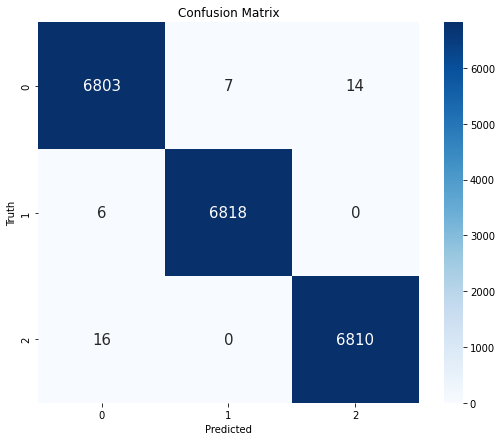

In [230]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_preds,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()